## <font color='red'> **Importing data** </font>

💡 If you want to reuse this notebook with Google Colab, I suggest you import the data into your Google Drive account, so you don't have to import everything directly into the notebook.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Teams Overall

In [4]:
# Importing the general team stats page
with open("/content/drive/My Drive/Premier League Project/overall.txt", "r", encoding="utf-8") as file:
    overall_page = file.read()

In [5]:
### Teams Overall
# Using BeautifulSoup to extract data
soup_teamsoverall = BeautifulSoup(overall_page, "html.parser")
table_teamsoverall = soup_teamsoverall.find("table", class_="stats_table sortable min_width force_mobilize now_sortable", id="results2023-202491_overall")

# Extract column headers
headers_teamsoverall = [th.get_text(strip=True) for th in table_teamsoverall.find("thead").find_all("th")]
# Exclude the last 4 columns
headers_teamsoverall = headers_teamsoverall[:-4]

# Initialise a list to store team data
data_rows = []

# Browse lines in the tbody tag
for row in table_teamsoverall.find("tbody").find_all("tr"):
    # Extract data from each column in a list
    row_data = [td.get_text(strip=True) for td in row.find_all(["th", "td"])][:-4]
    row_data[headers_teamsoverall.index("MP")] = int(row_data[headers_teamsoverall.index("MP")])
    row_data[headers_teamsoverall.index("W")] = int(row_data[headers_teamsoverall.index("W")])
    row_data[headers_teamsoverall.index("D")] = int(row_data[headers_teamsoverall.index("D")])
    row_data[headers_teamsoverall.index("L")] = int(row_data[headers_teamsoverall.index("L")])
    row_data[headers_teamsoverall.index("GF")] = int(row_data[headers_teamsoverall.index("GF")])
    row_data[headers_teamsoverall.index("GA")] = int(row_data[headers_teamsoverall.index("GA")])
    row_data[headers_teamsoverall.index("GD")] = int(row_data[headers_teamsoverall.index("GD")])
    row_data[headers_teamsoverall.index("Pts")] = int(row_data[headers_teamsoverall.index("Pts")])
    row_data[headers_teamsoverall.index("Pts/MP")] = float(row_data[headers_teamsoverall.index("Pts/MP")])
    row_data[headers_teamsoverall.index("xG")] = float(row_data[headers_teamsoverall.index("xG")])
    row_data[headers_teamsoverall.index("xGA")] = float(row_data[headers_teamsoverall.index("xGA")])
    row_data[headers_teamsoverall.index("xGD")] = float(row_data[headers_teamsoverall.index("xGD")])
    row_data[headers_teamsoverall.index("xGD/90")] = float(row_data[headers_teamsoverall.index("xGD/90")])

    # Add data to the main list
    data_rows.append(row_data)

In [6]:
# Create a DataFrame from extracted data
teamsoverall = pd.DataFrame(data_rows, columns=headers_teamsoverall)
# Rename the 'Squad' column to 'Team'
teamsoverall = teamsoverall.rename(columns={'Squad': 'Team'})

### Teams Home/Away

In [7]:
### Teams Home Away
# Using BeautifulSoup to extract data
soup_teamshomeaway = BeautifulSoup(overall_page, "html.parser")
table_teamshomeaway = soup_teamshomeaway.find("table", class_="stats_table sortable min_width force_mobilize now_sortable", id="results2023-202491_home_away")

# Extract column headers
headers_teamshomeaway = [th.get_text(strip=True) for th in table_teamshomeaway.find("thead").find_all("th")]
headers_teamshomeaway = headers_teamshomeaway[3:]

# Create a dictionary to track occurrences
occurrences = {}

# Browse the list and add suffixes
for i, header in enumerate(headers_teamshomeaway):
    if header not in ['Rk', 'Squad']:  # Ignore 'Rk' and 'Squad'
        if header in occurrences:
            # If the element has already been encountered, add the suffix 'Away'
            headers_teamshomeaway[i] += ' Away'
        else:
            # If this is the first occurrence, add the suffix 'Home'
            headers_teamshomeaway[i] += ' Home'
            occurrences[header] = True  # Mark as encountered

# Initialise a list to store team data
data_rows = []

# Browse lines in the tbody tag
for row in table_teamshomeaway.find("tbody").find_all("tr"):
    # Extract data from each column in a list
    row_data = [td.get_text(strip=True) for td in row.find_all(["th", "td"])]
    row_data[headers_teamshomeaway.index("MP Home")] = int(row_data[headers_teamshomeaway.index("MP Home")])
    row_data[headers_teamshomeaway.index("W Home")] = int(row_data[headers_teamshomeaway.index("W Home")])
    row_data[headers_teamshomeaway.index("D Home")] = int(row_data[headers_teamshomeaway.index("D Home")])
    row_data[headers_teamshomeaway.index("L Home")] = int(row_data[headers_teamshomeaway.index("L Home")])
    row_data[headers_teamshomeaway.index("GF Home")] = int(row_data[headers_teamshomeaway.index("GF Home")])
    row_data[headers_teamshomeaway.index("GA Home")] = float(row_data[headers_teamshomeaway.index("GA Home")])
    row_data[headers_teamshomeaway.index("GD Home")] = float(row_data[headers_teamshomeaway.index("GD Home")])
    row_data[headers_teamshomeaway.index("Pts Home")] = float(row_data[headers_teamshomeaway.index("Pts Home")])
    row_data[headers_teamshomeaway.index("Pts/MP Home")] = float(row_data[headers_teamshomeaway.index("Pts/MP Home")])
    row_data[headers_teamshomeaway.index("xG Home")] = float(row_data[headers_teamshomeaway.index("xG Home")])
    row_data[headers_teamshomeaway.index("xGA Home")] = float(row_data[headers_teamshomeaway.index("xGA Home")])
    row_data[headers_teamshomeaway.index("xGD Home")] = float(row_data[headers_teamshomeaway.index("xGD Home")])
    row_data[headers_teamshomeaway.index("xGD/90 Home")] = float(row_data[headers_teamshomeaway.index("xGD/90 Home")])
    row_data[headers_teamshomeaway.index("MP Away")] = int(row_data[headers_teamshomeaway.index("MP Away")])
    row_data[headers_teamshomeaway.index("W Away")] = int(row_data[headers_teamshomeaway.index("W Away")])
    row_data[headers_teamshomeaway.index("D Away")] = int(row_data[headers_teamshomeaway.index("D Away")])
    row_data[headers_teamshomeaway.index("L Away")] = int(row_data[headers_teamshomeaway.index("L Away")])
    row_data[headers_teamshomeaway.index("GF Away")] = int(row_data[headers_teamshomeaway.index("GF Away")])
    row_data[headers_teamshomeaway.index("GA Away")] = float(row_data[headers_teamshomeaway.index("GA Away")])
    row_data[headers_teamshomeaway.index("GD Away")] = float(row_data[headers_teamshomeaway.index("GD Away")])
    row_data[headers_teamshomeaway.index("Pts Away")] = float(row_data[headers_teamshomeaway.index("Pts Away")])
    row_data[headers_teamshomeaway.index("Pts/MP Away")] = float(row_data[headers_teamshomeaway.index("Pts/MP Away")])
    row_data[headers_teamshomeaway.index("xG Away")] = float(row_data[headers_teamshomeaway.index("xG Away")])
    row_data[headers_teamshomeaway.index("xGA Away")] = float(row_data[headers_teamshomeaway.index("xGA Away")])
    row_data[headers_teamshomeaway.index("xGD Away")] = float(row_data[headers_teamshomeaway.index("xGD Away")])
    row_data[headers_teamshomeaway.index("xGD/90 Away")] = float(row_data[headers_teamshomeaway.index("xGD/90 Away")])

    # Add data to the main list
    data_rows.append(row_data)

In [8]:
# Create a DataFrame from extracted data
teamshomeaway = pd.DataFrame(data_rows, columns=headers_teamshomeaway)
# Rename the 'Squad' column to 'Team'
teamshomeaway = teamshomeaway.rename(columns={'Squad': 'Team'})

### Teams Miscellaneous

In [9]:
### Teams Miscellaneous
# Using BeautifulSoup to extract data
soup_teamsmisc = BeautifulSoup(overall_page, "html.parser")
table_teamsmisc = soup_teamsmisc.find("table", class_="stats_table sortable min_width now_sortable", id="stats_squads_misc_for")

# Extract column headers
headers_teamsmisc = [th.get_text(strip=True) for th in table_teamsmisc.find("thead").find_all("th")]
# Exclude the last 5 columns
headers_teamsmisc = headers_teamsmisc[3:]

# Initialise a list to store team data
data_rows = []

# Browse lines in the tbody tag
for row in table_teamsmisc.find("tbody").find_all("tr"):
    # Extract data from each column in a list
    row_data = [td.get_text(strip=True) for td in row.find_all(["th", "td"])]
    row_data[headers_teamsmisc.index("# Pl")] = int(row_data[headers_teamsmisc.index("# Pl")])
    row_data[headers_teamsmisc.index("90s")] = float(row_data[headers_teamsmisc.index("90s")])
    row_data[headers_teamsmisc.index("CrdY")] = int(row_data[headers_teamsmisc.index("CrdY")])
    row_data[headers_teamsmisc.index("CrdR")] = int(row_data[headers_teamsmisc.index("CrdR")])
    row_data[headers_teamsmisc.index("2CrdY")] = int(row_data[headers_teamsmisc.index("2CrdY")])
    row_data[headers_teamsmisc.index("Fls")] = int(row_data[headers_teamsmisc.index("Fls")])
    row_data[headers_teamsmisc.index("Fld")] = int(row_data[headers_teamsmisc.index("Fld")])
    row_data[headers_teamsmisc.index("Off")] = int(row_data[headers_teamsmisc.index("Off")])
    row_data[headers_teamsmisc.index("Crs")] = int(row_data[headers_teamsmisc.index("Crs")])
    row_data[headers_teamsmisc.index("Int")] = int(row_data[headers_teamsmisc.index("Int")])
    row_data[headers_teamsmisc.index("TklW")] = int(row_data[headers_teamsmisc.index("TklW")])
    row_data[headers_teamsmisc.index("PKwon")] = int(row_data[headers_teamsmisc.index("PKwon")])
    row_data[headers_teamsmisc.index("PKcon")] = int(row_data[headers_teamsmisc.index("PKcon")])
    row_data[headers_teamsmisc.index("OG")] = int(row_data[headers_teamsmisc.index("OG")])
    row_data[headers_teamsmisc.index("Recov")] = int(row_data[headers_teamsmisc.index("Recov")])
    row_data[headers_teamsmisc.index("Won")] = int(row_data[headers_teamsmisc.index("Won")])
    row_data[headers_teamsmisc.index("Lost")] = int(row_data[headers_teamsmisc.index("Lost")])
    row_data[headers_teamsmisc.index("Won%")] = float(row_data[headers_teamsmisc.index("Won%")])

    # Add data to the main list
    data_rows.append(row_data)

In [10]:
# Create a DataFrame from extracted data
teamsmisc = pd.DataFrame(data_rows, columns=headers_teamsmisc)
# Rename the 'Squad' column to 'Team'
teamsmisc = teamsmisc.rename(columns={'Squad': 'Team'})

### All players

In [11]:
# Importing the list of all players
with open("/content/drive/My Drive/Premier League Project/allplayers.txt", "r", encoding="utf-8") as file:
    allplayers_page = file.read()

In [12]:
### All players
# Using BeautifulSoup to extract data
soup_allplayers = BeautifulSoup(allplayers_page, "html.parser")
table_allplayers = soup_allplayers.find("table", class_="min_width sortable stats_table shade_zero now_sortable sticky_table eq2 re2 le2")

# Extract column headers
headers_allplayers = [th.get_text(strip=True) for th in table_allplayers.find("thead").find_all("th")]
# Exclude the first 8 columns
headers_allplayers = headers_allplayers[7:]

# Initialise a list to store player data
data_rows = []

# Browse lines in the tbody tag
for row in table_allplayers.find("tbody").find_all("tr"):
    # Extract data from each column in a list
    row_data = [td.get_text(strip=True) for td in row.find_all(["th", "td"])]
    # Convert the minutes format if necessary
    if "Min" in headers_allplayers:
        row_data[headers_allplayers.index("Min")] = row_data[headers_allplayers.index("Min")].replace(",", "")
    # Add data to the main list
    data_rows.append(row_data)

# Ensure that all rows have the same number of columns
max_cols = max(len(row) for row in data_rows)
data_rows = [row + [""] * (max_cols - len(row)) for row in data_rows]

In [13]:
# Create a DataFrame from extracted data
allplayers = pd.DataFrame(data_rows, columns=headers_allplayers)
# Delete the first and last columns of the DataFrame
allplayers = allplayers.drop(columns=[allplayers.columns[0], allplayers.columns[-1]])
# Rename the 'Squad' column to 'Team' and convert 'Min' format in numeric
allplayers = allplayers.rename(columns={'Squad': 'Team'})
allplayers['Min'] = pd.to_numeric(allplayers['Min'], errors='coerce')

### Goalkeepers

In [14]:
# Importing the list of all goalkeepers
with open("/content/drive/My Drive/Premier League Project/goalkeepers.txt", "r", encoding="utf-8") as file:
    goalkeepers_page = file.read()

In [15]:
### Goalkeepers
# Using BeautifulSoup to extract data
soup_goalkeepers = BeautifulSoup(goalkeepers_page, "html.parser")
table_goalkeepers = soup_goalkeepers.find("table", class_="min_width sortable stats_table shade_zero now_sortable sticky_table eq2 re2 le2")

# Extract column headers
headers_goalkeepers = [th.get_text(strip=True) for th in table_goalkeepers.find("thead").find_all("th")]
# Exclude the first 5 columns
headers_goalkeepers = headers_goalkeepers[5:]

# Initialise a list to store player data
data_rows = []

# Browse lines in the tbody tag
for row in table_goalkeepers.find("tbody").find_all("tr"):
    # Extract data from each column in a list
    row_data = [td.get_text(strip=True) for td in row.find_all(["th", "td"])]
    # Convert the minutes format if necessary
    if "Min" in headers_goalkeepers:
        row_data[headers_goalkeepers.index("Min")] = row_data[headers_goalkeepers.index("Min")].replace(",", "")
    # Add data to the main list
    data_rows.append(row_data)

# Ensure that all rows have the same number of columns
max_cols = max(len(row) for row in data_rows)
data_rows = [row + [""] * (max_cols - len(row)) for row in data_rows]

In [16]:
# Create a DataFrame from extracted data
goalkeepers = pd.DataFrame(data_rows, columns=headers_goalkeepers)
# Delete the first and last columns of the DataFrame
goalkeepers = goalkeepers.drop(columns=[goalkeepers.columns[0], goalkeepers.columns[-1]])
# Rename the 'Squad' column to 'Team' and convert 'Min' format in numeric
goalkeepers = goalkeepers.rename(columns={'Squad': 'Team'})
goalkeepers['Min'] = pd.to_numeric(goalkeepers['Min'], errors='coerce')
# Drop lines that repeats the header
goalkeepers = goalkeepers[goalkeepers['Player'] != 'Player']

### Fixtures

In [17]:
# Importing the list of all team fixtures
with open("/content/drive/My Drive/Premier League Project/fixtures.txt", "r", encoding="utf-8") as file:
    fixtures_page = file.read()

In [18]:
### Fixtures
# Using BeautifulSoup to extract data
soup_fixtures = BeautifulSoup(fixtures_page, "html.parser")
table_fixtures = soup_fixtures.find("table", class_="stats_table sortable min_width now_sortable sticky_table eq5 eq9 re9 le5")

# Extract column headers
headers_fixtures = [th.get_text(strip=True) for th in table_fixtures.find("thead").find_all("th")]
# Excluding the 2nd, 4th and 5th elements from the end
headers_fixtures = headers_fixtures[:-2]

# Browse the list and add suffixes to 'xG' items
for i in range(len(headers_fixtures)):
    if headers_fixtures[i] == 'xG':
        # Add the suffix 'Home' to the first 'xG'
        headers_fixtures[i] += ' Home'
        break  # Stop the loop after finding the first 'xG'

for i in range(len(headers_fixtures)):
    if headers_fixtures[i] == 'xG':
        # Add the suffix 'Away' to the second 'xG'
        headers_fixtures[i] += ' Away'
        break  # Stop the loop after finding the second 'xG'

# Initialise a list to store fixtures data
data_rows = []

for row in table_fixtures.find("tbody").find_all("tr"):
    # Extract data from each column in a list
    row_data = [td.get_text(strip=True) for td in row.find_all(["th", "td"])][:-2]
    # Ignore the list if it contains only empty strings
    if not all(value == '' for value in row_data):
        # Convert the Attendance format if necessary
        if "Attendance" in headers_fixtures:
            row_data[headers_fixtures.index("Attendance")] = row_data[headers_fixtures.index("Attendance")].replace(",", "")
        # Add data to the main list
        data_rows.append(row_data)

In [19]:
# Create a DataFrame from extracted data
fixtures = pd.DataFrame(data_rows, columns=headers_fixtures)
fixtures['Wk'] = pd.to_numeric(fixtures['Wk'], errors='coerce').fillna(40).astype(int)
fixtures['xG Home'] = pd.to_numeric(fixtures['xG Home'], errors='coerce')
fixtures['xG Away'] = pd.to_numeric(fixtures['xG Away'], errors='coerce')
fixtures['Attendance'] = pd.to_numeric(fixtures['Attendance'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

### All teams goals

In [20]:
premiereleaguegoals = pd.read_csv("/content/drive/My Drive/Premier League Project/PremiereLeagueGoals.csv", sep=";")

### Reformatting DataFrames

In [21]:
# Renaming teams with quotes
teamshomeaway['Team'] = teamshomeaway['Team'].replace("Nott'ham Forest", "Nottingham Forest")
teamsoverall['Team'] = teamsoverall['Team'].replace("Nott'ham Forest", "Nottingham Forest")
fixtures['Home'] = fixtures['Home'].replace("Nott'ham Forest", "Nottingham Forest")
fixtures['Away'] = fixtures['Away'].replace("Nott'ham Forest", "Nottingham Forest")
allplayers['Team'] = allplayers['Team'].replace("Nott'ham Forest", "Nottingham Forest")
goalkeepers['Team'] = goalkeepers['Team'].replace("Nott'ham Forest", "Nottingham Forest")

In [22]:
premiereleaguegoals['Team'] = premiereleaguegoals['Team'].replace("Nott'ham Forest", "Nottingham Forest")
premiereleaguegoals['Opponent'] = premiereleaguegoals['Opponent'].replace("Nott'ham Forest", "Nottingham Forest")

In [23]:
# Changing the hyphen format
fixtures['Score'] = fixtures['Score'].str.replace('–', '-')

# Separating team scores
fixtures[['HomeScore', 'AwayScore']] = fixtures['Score'].str.split('-', expand=True).apply(pd.to_numeric, errors='coerce')
fixtures['HomeScore'] = fixtures['HomeScore'].fillna(0).astype(int)
fixtures['AwayScore'] = fixtures['AwayScore'].fillna(0).astype(int)

# Points awarded according to score: if higher score, then 3 points and the other 0 points; if tied, then 1 point each
fixtures['HomePts'] = np.where(fixtures['HomeScore'] > fixtures['AwayScore'], 3, np.where(fixtures['HomeScore'] < fixtures['AwayScore'], 0, 1))
fixtures['AwayPts'] = np.where(fixtures['HomeScore'] < fixtures['AwayScore'], 3, np.where(fixtures['HomeScore'] > fixtures['AwayScore'], 0, 1))

In [24]:
# Creation of offensive and defensive efficiency indexes
teamsoverall['offensive efficiency'] = teamsoverall['GF'] - teamsoverall['xG'] # if positive, then effective
teamsoverall['defensive efficiency'] = teamsoverall['GA'] - teamsoverall['xGA'] # if negative, then effective
teamshomeaway['offensive efficiency Home'] = teamshomeaway['GF Home'] - teamshomeaway['xG Home'] # if positive, then effective
teamshomeaway['offensive efficiency Away'] = teamshomeaway['GF Away'] - teamshomeaway['xG Away'] # if positive, then effective
teamshomeaway['defensive efficiency Home'] = teamshomeaway['GA Home'] - teamshomeaway['xGA Home'] # if negative, then effective
teamshomeaway['defensive efficiency Away'] = teamshomeaway['GA Away'] - teamshomeaway['xGA Away'] # if negative, then effective

In [25]:
premiereleaguegoals = premiereleaguegoals.drop('Score', axis=1)

In [26]:
# Converting distance in meters
premiereleaguegoals['Distance'] = premiereleaguegoals['Distance'] * 0.9144

In [27]:
# Adding if a scorer was a starter or a substitute
premiereleaguegoals['Start'] = premiereleaguegoals['Start'].replace('Y*', 'Y')
premiereleaguegoals['Start'] = premiereleaguegoals['Start'].replace({'Y': 'Starting', 'N': 'Substitute'})

In [28]:
# Adding the average number of goals scored & conceded by matches played
teamsoverall['GF/Match'] = teamsoverall['GF'] / teamsoverall['MP']
teamsoverall['GA/Match'] = teamsoverall['GA'] / teamsoverall['MP']
teamsoverall = teamsoverall.sort_values(by="GF/Match", ascending=False).reset_index(drop=True)

In [29]:
teamsoverall['offensive efficiency'] = teamsoverall['GF'] - teamsoverall['xG'] # if positive, then effective
teamsoverall['defensive efficiency'] = teamsoverall['GA'] - teamsoverall['xGA'] # if negative, then effective

In [30]:
teamshomeaway['offensive efficiency Home'] = teamshomeaway['GF Home'] - teamshomeaway['xG Home'] # if positive, then effective
teamshomeaway['offensive efficiency Away'] = teamshomeaway['GF Away'] - teamshomeaway['xG Away'] # if positive, then effective
teamshomeaway['defensive efficiency Home'] = teamshomeaway['GA Home'] - teamshomeaway['xGA Home'] # if negative, then effective
teamshomeaway['defensive efficiency Away'] = teamshomeaway['GA Away'] - teamshomeaway['xGA Away'] # if negative, then effective

In [31]:
# Create a dictionary to keep track of the number of times each column has appeared
count_dict = {}

# Browse DataFrame columns
new_columns = []
for col in allplayers.columns:
    if col in count_dict:
        count_dict[col] += 1
        new_columns.append(col + "_" + str(count_dict[col]))
    else:
        count_dict[col] = 1
        new_columns.append(col)

# Assign new columns to the DataFrame
allplayers.columns = new_columns

# Renaming columns
new_columns = ['Player', 'Nation', 'Pos', 'Team', 'Age', 'Born', 'MP', 'Starts', 'Min',
               '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'Pkatt', 'CrdY', 'CrdR',
               'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Goals90s',
               'Assists90s', 'G+A90s', 'G-PK90s', 'G+A-PK90s', 'xG90s', 'xAG90s',
               'xG+xAG90s', 'npxG90s', 'npxG+xAG90s']

# Create a replacement dictionary
replace_dict = dict(zip(allplayers.columns, new_columns))

# Rename columns
allplayers.rename(columns=replace_dict, inplace=True)

In [32]:
allplayers = allplayers.dropna()

In [33]:
allplayers = allplayers.replace('', 0)

In [34]:
allplayers['Goals'] = allplayers['Goals'].astype(int)
allplayers['Assists'] = allplayers['Assists'].astype(int)
allplayers['xG'] = allplayers['xG'].astype(float)
allplayers['xAG'] = allplayers['xAG'].astype(float)

In [35]:
allplayers['offensive efficiency'] = allplayers['Goals'] - allplayers['xG']
allplayers['creativity efficiency'] = allplayers['Assists'] - allplayers['xAG']

In [36]:
allplayers['Nation'] = allplayers['Nation'].str.extract(r'([A-Z]+)')

In [37]:
def determine_category_scorers(row):
    if row['offensive efficiency'] > 0 and row['creativity efficiency'] > 0:
        return "Golden Boy"
    elif row['offensive efficiency'] == 0 and row['creativity efficiency'] == 0:
        return "Neutral"
    elif row['offensive efficiency'] > 0 and row['creativity efficiency'] <= 0:
        return "Scorer"
    elif row['offensive efficiency'] <= 0 and row['creativity efficiency'] > 0:
        return "Altruist"
    else:
        return "Struggler"

# Apply the function to each row in the DataFrame
allplayers['Category'] = allplayers.apply(determine_category_scorers, axis=1)

In [38]:
allplayers['PrgC'] = pd.to_numeric(allplayers['PrgC'], errors='coerce')

In [39]:
allplayers['PrgP'] = pd.to_numeric(allplayers['PrgP'], errors='coerce')

In [40]:
allplayers['PrgR'] = pd.to_numeric(allplayers['PrgR'], errors='coerce')

In [41]:
allplayers_90s = allplayers
allplayers['90s'] = pd.to_numeric(allplayers['90s'], errors='coerce')
allplayers_90s['PrgC90s'] = allplayers_90s['PrgC'] / allplayers_90s['90s']
allplayers_90s['PrgP90s'] = allplayers_90s['PrgP'] / allplayers_90s['90s']
allplayers_90s['PrgR90s'] = allplayers_90s['PrgR'] / allplayers_90s['90s']
allplayers_90s = allplayers_90s.dropna()
allplayers_90s = allplayers_90s[allplayers_90s['PrgC90s'] != np.inf]
allplayers_90s = allplayers_90s[allplayers_90s['PrgP90s'] != np.inf]
allplayers_90s = allplayers_90s[allplayers_90s['PrgR90s'] != np.inf]

In [42]:
goalkeepers = goalkeepers.replace('', 0)

In [43]:
# Create a dictionary to keep track of the number of times each column has appeared
count_dict = {}

# Browse DataFrame columns
new_columns = []
for col in goalkeepers.columns:
    if col in count_dict:
        count_dict[col] += 1
        new_columns.append(col + "_" + str(count_dict[col]))
    else:
        count_dict[col] = 1
        new_columns.append(col)

# Assign new columns to the DataFrame
goalkeepers.columns = new_columns

# Renaming columns
new_columns = ['Player',
 'Nation',
 'Pos',
 'Team',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'GA',
 'GA90',
 'SoTA',
 'Saves',
 'Save%',
 'W',
 'D',
 'L',
 'CS',
 'CS%',
 'PKatt',
 'PKA',
 'PKsv',
 'PKm',
 'PKSave%',]

# Create a replacement dictionary
replace_dict = dict(zip(goalkeepers.columns, new_columns))

# Rename columns
goalkeepers.rename(columns=replace_dict, inplace=True)

In [44]:
goalkeepers['Nation'] = goalkeepers['Nation'].str.extract(r'([A-Z]+)')
goalkeepers['Player'] = goalkeepers['Player'].astype(str)
goalkeepers['90s'] = pd.to_numeric(goalkeepers['90s'], errors='coerce')
goalkeepers['GA'] = pd.to_numeric(goalkeepers['GA'], errors='coerce')
goalkeepers['GA90'] = pd.to_numeric(goalkeepers['GA90'], errors='coerce')
goalkeepers['SoTA'] = pd.to_numeric(goalkeepers['SoTA'], errors='coerce')
goalkeepers['Saves'] = pd.to_numeric(goalkeepers['Saves'], errors='coerce')
goalkeepers['W'] = pd.to_numeric(goalkeepers['W'], errors='coerce')
goalkeepers['D'] = pd.to_numeric(goalkeepers['D'], errors='coerce')
goalkeepers['L'] = pd.to_numeric(goalkeepers['L'], errors='coerce')
goalkeepers['CS'] = pd.to_numeric(goalkeepers['CS'], errors='coerce')
goalkeepers['Save%'] = goalkeepers['Save%'].astype(float)

In [45]:
goalkeepers['Save%perMin'] = goalkeepers['Save%'] / goalkeepers['Min']

## <font color='red'> **Overall stats** </font>

In [46]:
only_goals_scored = premiereleaguegoals[premiereleaguegoals['Type'] == 'For']

In [47]:
number_of_goals_scored = only_goals_scored['Team'].count()
number_of_goals_scored

1248

### Scorers' starters/subs distribution

In [48]:
scorer_starting_repartition = only_goals_scored['Start'].value_counts()
scorer_starting_repartition

Start
Starting      1086
Substitute     162
Name: count, dtype: int64

### Type of goals distribution

In [49]:
type_of_goals = only_goals_scored['Motion'].value_counts()
type_of_goals

Motion
In Game         1010
Set Piece        131
Penalty Kick      95
Free Kick         12
Name: count, dtype: int64

### Most prolific gameweek

In [50]:
# Group by 'Wk' and sum 'HomeScore' and 'AwayScore' to create 'Goals'
goals_by_week = fixtures.groupby('Wk').agg({'HomeScore': 'sum', 'AwayScore': 'sum'}).reset_index()
goals_by_week['Goals'] = goals_by_week['HomeScore'] + goals_by_week['AwayScore']

# Drop 'HomeScore' and 'AwayScore' columns
goals_by_week.drop(['HomeScore', 'AwayScore'], axis=1, inplace=True)

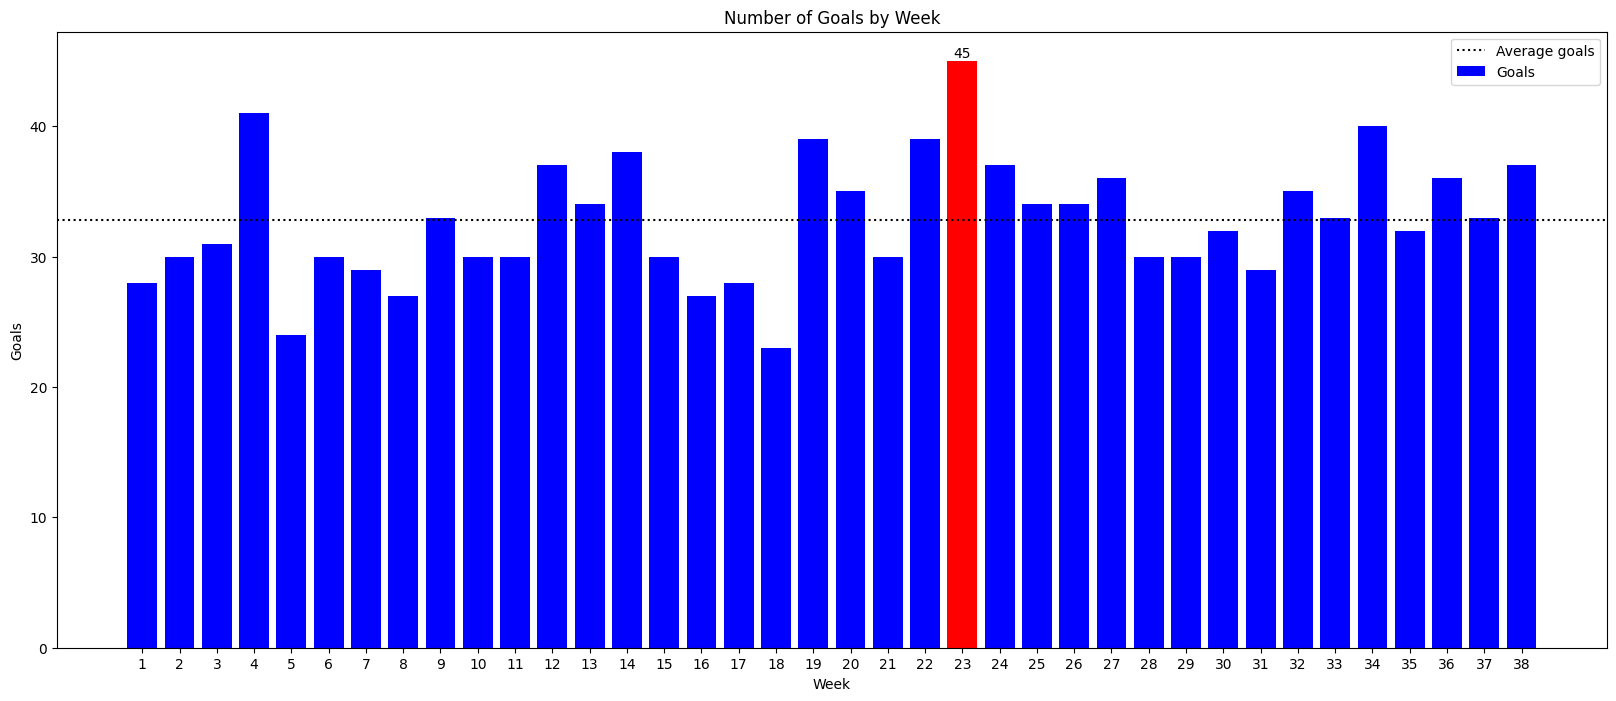

In [51]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Find the index of the week with the most goals
max_goals_index = goals_by_week['Goals'].idxmax()
# Calculate the 'Goals' average
average_goals = goals_by_week['Goals'].mean()

# Create a list of colors, one for each week
colors = ['blue' if i != max_goals_index else 'red' for i in range(len(goals_by_week))]

# Create the bar chart
bars = plt.bar(goals_by_week['Wk'], goals_by_week['Goals'], color=colors)

# Labels and title
plt.xlabel('Week')
plt.ylabel('Goals')
plt.title('Number of Goals by Week')

# Add the number of goals on top of the red bar
for bar in bars:
    yval = bar.get_height()
    if bar.get_facecolor() == (1.0, 0.0, 0.0, 1.0):  # the color red in RGBA format
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Set xticks to display all weeks
plt.xticks(goals_by_week['Wk'])

# Add a horizontal line to the 'Goals' average
plt.axhline(y=average_goals, color='black', linestyle='dotted')

# Add a legend for the middle line
plt.legend(['Average goals', 'Goals'])

# Show plot
plt.show()

💡 The most prolific gameweek is **Gameweek 23**, with 45 goals scored.

In [52]:
average_goals

32.78947368421053

## <font color='red'> **Players** </font>

#### Most decisive players

💡 To calculate player decisiveness, we take into account players who have scored a goal, made a pass before a goal, or made a pass that leads to a goal. Thus, a player is taken into account if he is at least in the last 3 players leading to a goal.

In [53]:
# Definition of a function to count the number of times a player is involved in a goal
def count_player_occurrences(player_name):
    # Count the number of goals scored by the player in the 'Scorer' column and initialize to 0 if not found
    total_count = only_goals_scored['Scorer'].value_counts().get(player_name, 0)
    # Add the number of times the player is involved in the goal as GCA1 (Goal Creating Action 1)
    total_count += only_goals_scored['GCA1'].value_counts().get(player_name, 0)
    # Add the number of times the player is involved in the goal as GCA2 (Goal Creating Action 2)
    total_count += only_goals_scored['GCA2'].value_counts().get(player_name, 0)
    return total_count

# Create a list of all players involved in goals from the 'Scorer', 'GCA1', and 'GCA2' columns
players = only_goals_scored['Scorer'].tolist() + only_goals_scored['GCA1'].tolist() + only_goals_scored['GCA2'].tolist()
# Filter to remove NaN values
players = [player for player in players if pd.notna(player)]
# Convert to a set to get a unique list of players
players = set(players)

# Count the number of times each player is involved in goals
player_counts = {player: count_player_occurrences(player) for player in players}

# Create a DataFrame containing players and the number of goals involved, sorted by number of goals involved
decisive_players = pd.DataFrame({'Player': list(player_counts.keys()), 'Goals involved': list(player_counts.values())})
decisive_players = decisive_players.sort_values(by="Goals involved", ascending=False).reset_index(drop=True)

# Add a 'Team' column to the DataFrame and assign the team to each player
decisive_players['Team'] = None

for index, row in decisive_players.iterrows():
    player_name = row['Player']
    # Search for matching rows in the original DataFrame for each player
    matching_rows = only_goals_scored[
        (only_goals_scored['Scorer'] == player_name) | (only_goals_scored['GCA1'] == player_name) | (only_goals_scored['GCA2'] == player_name)
    ]

    if not matching_rows.empty:
        # Retrieve the team from the first matching row
        team = matching_rows.iloc[0]['Team']
        decisive_players.at[index, 'Team'] = team  # Assigning the team in the final DataFrame


In [54]:
# Grouping the DataFrame 'premiereleaguegoals' by team and goal type ('For' or 'Against'), then counting occurrences of each type
teams_goals = premiereleaguegoals.groupby('Team')['Type'].value_counts().unstack(fill_value=0)

# Renaming columns to provide clearer labels ('Against' -> 'Goals conceded', 'For' -> 'Goals scored'), then resetting index and sorting by 'Goals scored' in descending order
teams_goals = teams_goals.rename(columns={'Against': 'Goals conceded', 'For': 'Goals scored'}).reset_index().sort_values(by="Goals scored", ascending=False).reset_index(drop=True)

# Reordering columns to have 'Team', 'Goals scored', 'Goals conceded' in that order, and removing the index name
teams_goals = teams_goals[['Team', 'Goals scored', 'Goals conceded']].rename_axis(None, axis=1)

# Adding a new column 'Diff' to calculate the goal difference (Goals scored - Goals conceded)
teams_goals = teams_goals.assign(Diff = teams_goals['Goals scored'] - teams_goals['Goals conceded'])

In [55]:
# Initialize a new column 'Goals of the team' in the 'decisive_players' DataFrame
decisive_players['Goals of the team'] = None

# Loop through each row in 'decisive_players' DataFrame
for index, row in decisive_players.iterrows():
    team_name = row['Team']
    # Find the matching team in the 'teams_goals' DataFrame
    matching_team = teams_goals[teams_goals['Team'] == team_name]

    if not matching_team.empty:
        # If a matching team is found, retrieve the number of goals scored by the team
        goals_scored = matching_team.iloc[0]['Goals scored']
        # Assign the number of goals scored by the team to the corresponding player in 'decisive_players'
        decisive_players.at[index, 'Goals of the team'] = goals_scored

# Calculate the percentage of decisiveness for each player
decisive_players["% of decisiveness"] = (decisive_players['Goals involved'] / decisive_players['Goals of the team']) * 100

# Reorder columns and remove index name
decisive_players = decisive_players[['Player', 'Team', 'Goals involved', '% of decisiveness', 'Goals of the team']].rename_axis(None, axis=1)

# Sort the DataFrame by 'Goals involved' and '% of decisiveness' in descending order
decisive_players = decisive_players.sort_values(by=['Goals involved', '% of decisiveness'], ascending=[False, False]).reset_index(drop=True)

# Display the top 10 decisive players
decisive_players.head(10)

,Player,Team,Goals involved,% of decisiveness,Goals of the team
0,Cole Palmer,Chelsea,47,61.038961,77
1,Ollie Watkins,Aston Villa,45,59.210526,76
2,Anthony Gordon,Newcastle Utd,40,47.058824,85
3,Phil Foden,Manchester City,40,41.666667,96
4,Mohamed Salah,Liverpool,38,44.186047,86
5,Erling Haaland,Manchester City,38,39.583333,96
6,Bukayo Saka,Arsenal,36,39.56044,91
7,Kai Havertz,Arsenal,35,38.461538,91
8,Son Heung-min,Tottenham,34,45.945946,74
9,Alexander Isak,Newcastle Utd,31,36.470588,85


#### Best scorers

In [56]:
# Counting the number of goals scored by each player
goals_counts = premiereleaguegoals[premiereleaguegoals['Type'] == 'For']['Scorer'].value_counts()

# Creating a DataFrame with columns 'Scorer' and 'Goals'
scorers = pd.DataFrame({'Scorer': goals_counts.index, 'Goals': goals_counts.values})

# Extracting the mapping of scorers to teams
team_mapping = premiereleaguegoals[premiereleaguegoals['Type'] == 'For'][['Scorer', 'Team']]

# Merging the 'scorers' DataFrame with the team mapping on 'Scorer' column
scorers = scorers.merge(team_mapping, on='Scorer', how='left')

# Calculating the average expected goals (PSxG) for each scorer
avg_psxg = premiereleaguegoals.groupby('Scorer')['PSxG'].mean().reset_index()
avg_psxg.rename(columns={'PSxG': 'Avg PSxG'}, inplace=True)

# Merging the 'scorers' DataFrame with the average PSxG on 'Scorer' column, sorting by 'Goals' and 'Avg PSxG' in descending and ascending order respectively
scorers = scorers.merge(avg_psxg, on='Scorer', how='left').sort_values(by=['Goals', 'Avg PSxG'], ascending=[False, True]).drop_duplicates(subset=['Scorer']).reset_index(drop=True)

# Removing own goals from the DataFrame
scorers = scorers[~scorers['Scorer'].str.contains('\(OG\)')]

# Reordering columns and removing index name
scorers = scorers[['Scorer', 'Team', 'Goals', 'Avg PSxG']].rename_axis(None, axis=1)

# Printing the top 10 scorers DataFrame
scorers.head(10)

,Scorer,Team,Goals,Avg PSxG
0,Erling Haaland,Manchester City,27,0.682963
1,Cole Palmer,Chelsea,22,0.666744
2,Alexander Isak,Newcastle Utd,21,0.775238
3,Phil Foden,Manchester City,19,0.489474
4,Ollie Watkins,Aston Villa,19,0.539444
5,Dominic Solanke,Bournemouth,19,0.551579
6,Mohamed Salah,Liverpool,18,0.665556
7,Son Heung-min,Tottenham,17,0.594118
8,Jarrod Bowen,West Ham,16,0.645625
9,Jean-Philippe Mateta,Crystal Palace,16,0.648125


💡 The weaker PSxG is, the more unexpected and therefore beautiful the goals. On the contrary, the closer PSxG is to 1, the 'easier' the goals are to score.

#### Player with most assists

In [57]:
# Define a function to count the number of assists for a given player
def count_player_assists(player_name):
    # Add the number of assists made by the player in the 'Assist' column
    total_count = only_goals_scored['Assist'].value_counts().get(player_name, 0)
    return total_count

# Create a list of all players involved in assists
players_assists = only_goals_scored['Scorer'].tolist() + only_goals_scored['Assist'].tolist()
# Filter to remove NaN values
players_assists = [player for player in players_assists if pd.notna(player)]
# Convert to a set to get a unique list of players
players_assists = set(players_assists)

# Count the number of goals and assists for each player
player_counts = {player: count_player_assists(player) for player in players_assists}

# Create a DataFrame containing players and the number of goals and assists involved
assists_players = pd.DataFrame({'Player': list(player_counts.keys()), 'Goals involved': list(player_counts.values())})

# Initialize a 'Team' column in the DataFrame
assists_players['Team'] = None

# Iterate over each row in the DataFrame
for index, row in assists_players.iterrows():
    player_name = row['Player']
    # Find matching rows in the original DataFrame for each player
    matching_rows = only_goals_scored[
        only_goals_scored['Assist'] == player_name
    ]

    if not matching_rows.empty:
        # If matching rows are found, retrieve the team from the first matching row
        team = matching_rows.iloc[0]['Team']
        # Assign the team to the corresponding player in the DataFrame
        assists_players.at[index, 'Team'] = team

In [58]:
# Initialize a new column 'Goals of the team' in the 'assists_players' DataFrame
assists_players['Goals of the team'] = None

# Loop through each row in 'assists_players' DataFrame
for index, row in assists_players.iterrows():
    team_name = row['Team']
    # Find the matching team in the 'teams_goals' DataFrame
    matching_team = teams_goals[teams_goals['Team'] == team_name]

    if not matching_team.empty:
        # If a matching team is found, retrieve the number of goals scored by the team
        goals_scored = matching_team.iloc[0]['Goals scored']
        # Assign the number of goals scored by the team to the corresponding player in 'assists_players'
        assists_players.at[index, 'Goals of the team'] = goals_scored

# Calculate the percentage of decisiveness for each player
assists_players["% of decisiveness"] = (assists_players['Goals involved'] / assists_players['Goals of the team']) * 100

# Rename the column 'Goals involved' to 'Goals involved (assists)'
assists_players.rename(columns={'Goals involved': 'Goals involved (assists)'}, inplace=True)

# Reorder columns and remove index name
assists_players = assists_players[['Player', 'Team', 'Goals involved (assists)', '% of decisiveness', 'Goals of the team']].rename_axis(None, axis=1)

# Sort the DataFrame by 'Goals involved (assists)' and '% of decisiveness' in descending order
assists_players = assists_players.sort_values(by=["Goals involved (assists)", "% of decisiveness"], ascending=[False, False]).reset_index(drop=True)

# Display the top 10 players DataFrame
assists_players.head(10)

,Player,Team,Goals involved (assists),% of decisiveness,Goals of the team
0,Ollie Watkins,Aston Villa,13,17.105263,76
1,Cole Palmer,Chelsea,11,14.285714,77
2,Morgan Gibbs-White,Nottingham Forest,10,20.408163,49
3,Pascal Groß,Brighton,10,18.181818,55
4,Brennan Johnson,Tottenham,10,13.513514,74
5,Son Heung-min,Tottenham,10,13.513514,74
6,Anthony Gordon,Newcastle Utd,10,11.764706,85
7,Kieran Trippier,Newcastle Utd,10,11.764706,85
8,Mohamed Salah,Liverpool,10,11.627907,86
9,Martin Ødegaard,Arsenal,10,10.989011,91


#### Best scorers & assists (G+A)

In [59]:
# Define a function to count the number of goals and assists for a given player
def count_player_goals_assists(player_name):
    # Count the number of goals scored by the player in the 'Scorer' column and initialize to 0 if not found
    total_count = only_goals_scored['Scorer'].value_counts().get(player_name, 0)
    # Add the number of assists made by the player in the 'Assist' column
    total_count += only_goals_scored['Assist'].value_counts().get(player_name, 0)
    return total_count

# Create a list of all players involved in goals or assists
players_goals_assists = only_goals_scored['Scorer'].tolist() + only_goals_scored['Assist'].tolist()
# Filter to remove NaN values
players_goals_assists = [player for player in players_goals_assists if pd.notna(player)]
# Convert to a set to get a unique list of players
players_goals_assists = set(players_goals_assists)

# Count the number of goals and assists for each player
player_counts = {player: count_player_goals_assists(player) for player in players_goals_assists}

# Create a DataFrame containing players and the number of goals and assists involved
goals_assists_players = pd.DataFrame({'Player': list(player_counts.keys()), 'Goals involved': list(player_counts.values())})

# Initialize a 'Team' column in the DataFrame
goals_assists_players['Team'] = None

# Iterate over each row in the DataFrame
for index, row in goals_assists_players.iterrows():
    player_name = row['Player']
    # Find matching rows in the original DataFrame for each player
    matching_rows = only_goals_scored[
        (only_goals_scored['Scorer'] == player_name) | (only_goals_scored['Assist'] == player_name)
    ]

    if not matching_rows.empty:
        # If matching rows are found, retrieve the team from the first matching row
        team = matching_rows.iloc[0]['Team']
        # Assign the team to the corresponding player in the DataFrame
        goals_assists_players.at[index, 'Team'] = team

In [60]:
# Initialize a new column 'Goals of the team' in the 'goals_assists_players' DataFrame
goals_assists_players['Goals of the team'] = None

# Loop through each row in 'goals_assists_players' DataFrame
for index, row in goals_assists_players.iterrows():
    team_name = row['Team']
    # Find the matching team in the 'teams_goals' DataFrame
    matching_team = teams_goals[teams_goals['Team'] == team_name]

    if not matching_team.empty:
        # If a matching team is found, retrieve the number of goals scored by the team
        goals_scored = matching_team.iloc[0]['Goals scored']
        # Assign the number of goals scored by the team to the corresponding player in 'goals_assists_players'
        goals_assists_players.at[index, 'Goals of the team'] = goals_scored

# Calculate the percentage of decisiveness for each player
goals_assists_players["% of decisiveness"] = (goals_assists_players['Goals involved'] / goals_assists_players['Goals of the team']) * 100

# Rename the column 'Goals involved' to 'Goals involved (G+A)'
goals_assists_players.rename(columns={'Goals involved': 'Goals involved (G+A)'}, inplace=True)

# Reorder columns and remove index name
goals_assists_players = goals_assists_players[['Player', 'Team', 'Goals involved (G+A)', '% of decisiveness', 'Goals of the team']].rename_axis(None, axis=1)

# Sort the DataFrame by 'Goals involved (G+A)' and '% of decisiveness' in descending order
goals_assists_players = goals_assists_players.sort_values(by=["Goals involved (G+A)", "% of decisiveness"], ascending=[False, False]).reset_index(drop=True)

# Display the top 10 players DataFrame
goals_assists_players.head(10)

,Player,Team,Goals involved (G+A),% of decisiveness,Goals of the team
0,Cole Palmer,Chelsea,33,42.857143,77
1,Ollie Watkins,Aston Villa,32,42.105263,76
2,Erling Haaland,Manchester City,32,33.333333,96
3,Mohamed Salah,Liverpool,28,32.55814,86
4,Son Heung-min,Tottenham,27,36.486486,74
5,Phil Foden,Manchester City,27,28.125,96
6,Bukayo Saka,Arsenal,24,26.373626,91
7,Alexander Isak,Newcastle Utd,23,27.058824,85
8,Dominic Solanke,Bournemouth,22,40.740741,54
9,Jean-Philippe Mateta,Crystal Palace,21,36.842105,57


#### Focus on the 5 best players of your selected week

In [61]:
# Specify the chosen round
chosen_round = 'Matchweek 35'

In [62]:
# Function to count the number of goals scored by a team in a specific round
def count_goals_for_team_in_round(team_name, round_name):
    goals_scored = premiereleaguegoals[(premiereleaguegoals['Round'] == round_name) &
                                  (premiereleaguegoals['Type'] == 'For') &
                                  (premiereleaguegoals['Team'] == team_name)]['Scorer'].count()
    return goals_scored

# Function to count the total number of goals and assists by a player in a specific round
def count_player_goals_assists_round(player_name, round_name):
    total_count = premiereleaguegoals[(premiereleaguegoals['Round'] == round_name) &
                                 (premiereleaguegoals['Type'] == 'For')]['Scorer'].value_counts().get(player_name, 0)
    total_count += premiereleaguegoals[(premiereleaguegoals['Round'] == round_name) &
                                  (premiereleaguegoals['Type'] == 'For')]['Assist'].value_counts().get(player_name, 0)
    total_count = total_count
    return total_count

# Function to calculate the decisiveness of each player in a specific round
def calculate_decisiveness_for_round(round_name):
    # Filter data for the specified round and for goals scored (Type == 'For')
    filtered_round = premiereleaguegoals[(premiereleaguegoals['Round'] == round_name) & (premiereleaguegoals['Type'] == 'For')]

    # Get unique players involved in goals or assists in the specified round
    players_goals_assists_round = set()
    players_goals_assists_round.update(filtered_round['Scorer'].tolist())
    players_goals_assists_round.update(filtered_round['Assist'].tolist())
    players_goals_assists_round = [player for player in players_goals_assists_round if pd.notna(player)]

    # Count goals and assists for each player
    player_counts_round = {player: count_player_goals_assists_round(player, round_name) for player in players_goals_assists_round}

    # Create a DataFrame to store player counts and involvement
    goals_assists_players_round = pd.DataFrame({'Player': list(player_counts_round.keys()), 'Goals involved': list(player_counts_round.values())})
    goals_assists_players_round['Team'] = None

    # Iterate through players to determine their team
    for index, row in goals_assists_players_round.iterrows():
        player_name = row['Player']
        matching_rows = filtered_round[
            (filtered_round['Scorer'] == player_name) | (filtered_round['Assist'] == player_name)
        ]
        if not matching_rows.empty:
            team = matching_rows.iloc[0]['Team']
            goals_assists_players_round.at[index, 'Team'] = team

    # Calculate the number of goals scored by each player's team in the specified round
    goals_assists_players_round['Goals of the team'] = None
    for index, row in goals_assists_players_round.iterrows():
        team_name = row['Team']
        goals_scored = count_goals_for_team_in_round(team_name, round_name)
        goals_assists_players_round.at[index, 'Goals of the team'] = goals_scored

    # Calculate the percentage of decisiveness for each player
    goals_assists_players_round["% of decisiveness"] = (goals_assists_players_round['Goals involved'] / goals_assists_players_round['Goals of the team']) * 100

    # Calculate the total goals scored by each player
    goals_assists_players_round['Goals scored'] = goals_assists_players_round['Player'].apply(
        lambda player: filtered_round[(filtered_round['Scorer'] == player)]['Scorer'].count()
    )

    # Calculate the average expected goals (PSxG) per shot for each player
    psxg_values = []
    for index, row in goals_assists_players_round.iterrows():
        player_name = row['Player']
        player_goals = filtered_round[filtered_round['Scorer'] == player_name]
        player_assists = filtered_round[filtered_round['Assist'] == player_name]

        psxg_sum = player_goals['PSxG'].sum()
        psxg_count = player_goals.shape[0]

        for _, assist_row in player_assists.iterrows():
            psxg_sum += assist_row['PSxG']
            psxg_count += 1

        if psxg_count > 0:
            psxg_values.append(psxg_sum / psxg_count)
        else:
            psxg_values.append(0)
    goals_assists_players_round['PSxG'] = psxg_values

    # Filter out players containing '(OG)' in their names (players that scored own goals)
    goals_assists_players_round = goals_assists_players_round[~goals_assists_players_round['Player'].str.contains('\(OG\)')]

    # Sort players based on involvement in goals, goals scored, and PSxG
    goals_assists_players_round = goals_assists_players_round.sort_values(by=["Goals involved", "Goals scored", "PSxG"], ascending=[False, False, True]).reset_index(drop=True)
    return goals_assists_players_round

# Calculate decisiveness for the chosen round and display the top 5 players
results_for_chosen_round = calculate_decisiveness_for_round(chosen_round)
results_for_chosen_round.head(5)

,Player,Goals involved,Team,Goals of the team,% of decisiveness,Goals scored,PSxG
0,Alexander Isak,2,Newcastle Utd,5,40.0,2,0.915
1,Noni Madueke,2,Chelsea,2,100.0,1,0.235
2,Kai Havertz,2,Arsenal,3,66.666667,1,0.335
3,Enes Ünal,2,Bournemouth,3,66.666667,1,0.530
4,Jarrod Bowen,2,West Ham,2,100.0,1,0.635


#### Search informations about a player

In [63]:
player_searched = 'Ethan Nwaneri'

In [64]:
searching_player = allplayers[(allplayers['Player'] == player_searched)].drop(['Nation', 'Starts', 'Born', 'npxG', 'npxG+xAG', 'Goals90s', 'Assists90s', 'G-PK90s', 'xG+xAG90s', 'npxG90s', 'npxG+xAG90s', 'G+A90s', 'G+A-PK90s', 'xG90s', 'xAG90s'], axis=1)
searching_player

,Player,Pos,Team,Age,MP,Min,90s,Goals,Assists,G+A,...,xAG,PrgC,PrgP,PrgR,offensive efficiency,creativity efficiency,Category,PrgC90s,PrgP90s,PrgR90s
387,Ethan Nwaneri,FW,Arsenal,16,1,14,0.2,0,0,0,...,0.0,2,2,1,0.0,0.0,Neutral,10.0,10.0,5.0


### Effectiveness

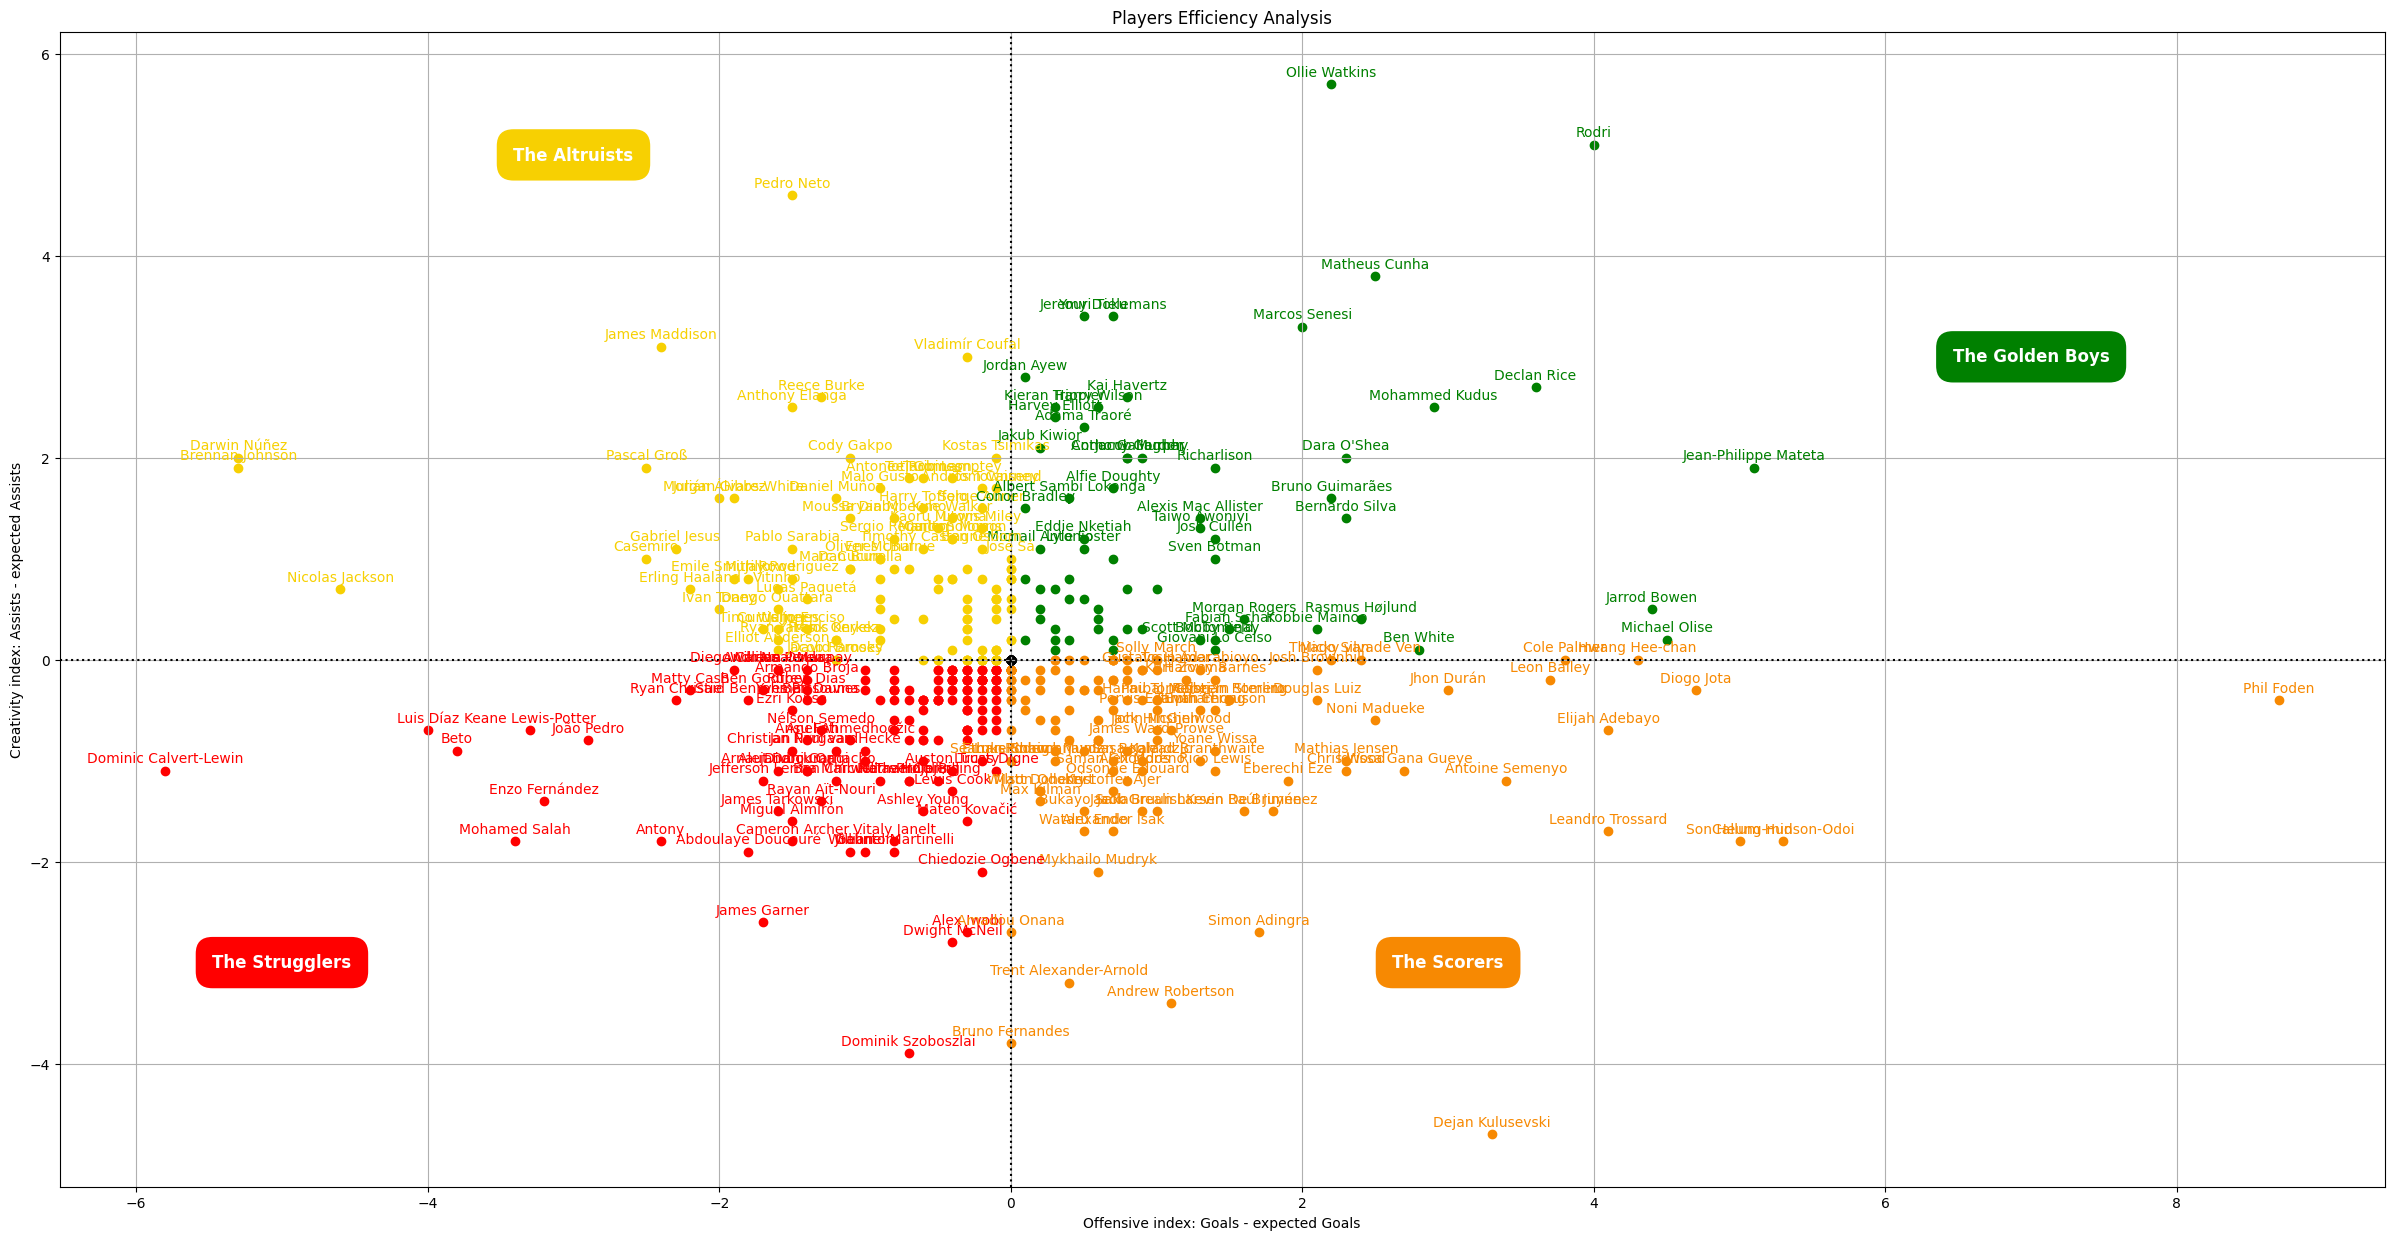

In [65]:
plt.figure(figsize=(30, 15))

for index, row in allplayers.iterrows():
    player = row['Player']
    offensive_efficiency = row['offensive efficiency']
    creativity_efficiency = row['creativity efficiency']

    # Only displaying names of players for values far from origin, to be able to see better the names
    if offensive_efficiency == 0 and creativity_efficiency == 0:
        plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='black')
    elif offensive_efficiency > 0 and creativity_efficiency > 0:
        if offensive_efficiency > 1 or creativity_efficiency > 1:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='green')
            plt.text(offensive_efficiency, creativity_efficiency + 0.05, player, fontsize=10, ha='center', va='bottom', color='green')
        else:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='green')
    elif offensive_efficiency < 0 and creativity_efficiency < 0:
        if offensive_efficiency < -1 or creativity_efficiency < -1:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='red')
            plt.text(offensive_efficiency, creativity_efficiency + 0.05, player, fontsize=10, ha='center', va='bottom', color='red')
        else:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='red')
    elif offensive_efficiency >= 0 and creativity_efficiency <= 0:
        if offensive_efficiency >= 1 or creativity_efficiency <= -1:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='#F78902') #orange
            plt.text(offensive_efficiency, creativity_efficiency + 0.05, player, fontsize=10, ha='center', va='bottom', color='#F78902')
        else:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='#F78902') #orange
    elif offensive_efficiency <= 0 and creativity_efficiency >= 0:
        if offensive_efficiency <= -1 or creativity_efficiency >= 1:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='#F7D002') #gold
            plt.text(offensive_efficiency, creativity_efficiency + 0.05, player, fontsize=10, ha='center', va='bottom', color='#F7D002')
        else:
            plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='#F7D002') #gold
    else:
        plt.scatter(offensive_efficiency, creativity_efficiency, label=player, color='black')

plt.annotate("The Altruists", (-3, 5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F7D002", ec="none"), weight='bold')
plt.annotate("The Golden Boys", (7, 3), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="green", ec="none"), weight='bold')
plt.annotate("The Scorers", (3, -3), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F78902", ec="none"), weight='bold')
plt.annotate("The Strugglers", (-5, -3), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="red", ec="none"), weight='bold')

plt.xlabel('Offensive index: Goals - expected Goals')
plt.ylabel('Creativity index: Assists - expected Assists')
plt.title('Players Efficiency Analysis')
plt.axhline(0, color='black', linestyle=':')
plt.axvline(0, color='black', linestyle=':')
plt.grid(True)

plt.show()

### Youngest player (no more available)

In [66]:
# Split the 'Age' column into two new columns 'Years' and 'Days'
#allplayers[['Years', 'Days']] = allplayers['Age'].str.split('-', expand=True)

# Convert 'Years' and 'Days' to numeric
#allplayers['Years'] = pd.to_numeric(allplayers['Years'], errors='coerce')
#allplayers['Days'] = pd.to_numeric(allplayers['Days'], errors='coerce')

# Convert 'Years' and 'Days' to a single 'Age_in_days' column
#allplayers['Age_in_days'] = allplayers['Years'] * 365 + allplayers['Days']

# Now find the youngest player that has played this season
#youngest_player = allplayers.loc[allplayers['Age_in_days'].idxmin()]
#print(youngest_player.Player + " (" + youngest_player.Team + ")" + " - " + str(youngest_player.Age) + " played " + str(youngest_player.Min) + " minutes.")

### Oldest player (no more available)

In [67]:
#oldest_player = allplayers.loc[allplayers['Age_in_days'].idxmax()]
#print(oldest_player.Player + " (" + oldest_player.Team + ")" + " - " + str(oldest_player.Age) + " played " + str(oldest_player.Min) + " minutes.")

### Goalkeepers

#### Save % for all GK

In [68]:
goalkeepers.sort_values(by="Save%", ascending=False)[['Player', 'Team', 'MP', 'Min', 'SoTA', 'Saves', 'GA', 'Save%']]

,Player,Team,MP,Min,SoTA,Saves,GA,Save%
31,James Shea,Luton Town,1,15,2,2,0,100.0
17,Arijanet Muric,Burnley,10,900,78,62,16,80.8
35,Mark Travers,Bournemouth,4,360,18,13,5,77.8
33,Thomas Strakosha,Brentford,2,135,8,6,2,75.0
20,André Onana,Manchester Utd,38,3420,203,146,58,74.9
1,Alphonse Areola,West Ham,31,2699,188,136,53,74.5
21,Stefan Ortega,Manchester City,9,635,27,20,7,74.1
23,Jordan Pickford,Everton,38,3420,165,117,51,73.9
28,José Sá,Wolves,35,3037,188,131,58,73.4
0,Alisson,Liverpool,28,2520,109,80,30,73.4


#### Save % for GK who played at least 5 matches

In [69]:
goalkeepers_more_than_5matches = goalkeepers[goalkeepers['Min'] > 450].copy()

In [70]:
# Convert 'MP' into numeric
goalkeepers_more_than_5matches['MP'] = pd.to_numeric(goalkeepers_more_than_5matches['MP'], errors='coerce')

# Calculate Saves/MP ratio
goalkeepers_more_than_5matches['Saves/MP'] = goalkeepers_more_than_5matches['Saves'] / goalkeepers_more_than_5matches['MP']

In [71]:
goalkeepers_more_than_5matches.sort_values(by="Saves/MP", ascending=False)[['Player', 'Team', 'MP', 'Min', 'SoTA', 'Saves', 'GA', 'Save%', 'Saves/MP']]

,Player,Team,MP,Min,SoTA,Saves,GA,Save%,Saves/MP
17,Arijanet Muric,Burnley,10,900,78,62,16,80.8,6.200000
1,Alphonse Areola,West Ham,31,2699,188,136,53,74.5,4.387097
7,Wes Foderingham,Sheffield Utd,30,2649,204,130,79,63.7,4.333333
8,Ivo Grbić,Sheffield Utd,9,771,59,36,25,57.6,4.000000
20,André Onana,Manchester Utd,38,3420,203,146,58,74.9,3.842105
34,James Trafford,Burnley,28,2520,166,106,62,65.7,3.785714
3,Martin Dúbravka,Newcastle Utd,23,1985,130,87,42,70.8,3.782609
28,José Sá,Wolves,35,3037,188,131,58,73.4,3.742857
11,Thomas Kaminski,Luton Town,38,3405,220,139,85,63.2,3.657895
14,Bernd Leno,Fulham,38,3420,190,133,61,72.1,3.500000


In [72]:
goalkeepers_more_than_5matches.rename(columns={'Player': 'Goalkeeper'}, inplace=True)

#### Expected Goals conceded

In [73]:
psxg_per_goalkeeper = only_goals_scored.groupby('Goalkeeper')['PSxG'].sum()

In [74]:
goalkeepers_more_than_5matches = goalkeepers_more_than_5matches[['Goalkeeper', 'Team', 'MP', 'Min', 'SoTA', 'Saves', 'GA', 'Save%', 'Saves/MP']].merge(psxg_per_goalkeeper, on='Goalkeeper', how='left')

In [75]:
goalkeepers_more_than_5matches['efficiency GK'] = goalkeepers_more_than_5matches['GA'] - goalkeepers_more_than_5matches['PSxG']

In [76]:
goalkeepers_more_than_5matches['PSxG/GA'] = goalkeepers_more_than_5matches['PSxG'] / goalkeepers_more_than_5matches['GA']

In [77]:
goalkeepers_more_than_5matches.sort_values(by="PSxG/GA", ascending=True)

,Goalkeeper,Team,MP,Min,SoTA,Saves,GA,Save%,Saves/MP,PSxG,efficiency GK,PSxG/GA
7,Ivo Grbić,Sheffield Utd,9,771,59,36,25,57.6,4.000000,9.30,15.70,0.372000
0,Alisson,Liverpool,28,2520,109,80,30,73.4,2.857143,11.94,18.06,0.398000
25,Matz Sels,Nottingham Forest,16,1440,61,36,27,57.4,2.250000,11.51,15.49,0.426296
18,Đorđe Petrović,Chelsea,23,1987,108,73,38,65.7,3.173913,16.40,21.60,0.431579
11,Caoimhín Kelleher,Liverpool,10,900,38,28,11,71.1,2.800000,4.85,6.15,0.440909
28,Matt Turner,Nottingham Forest,17,1530,80,52,28,67.5,3.058824,13.03,14.97,0.465357
24,Robert Sánchez,Chelsea,16,1433,78,52,25,70.5,3.250000,11.79,13.21,0.471600
22,David Raya,Arsenal,32,2880,69,45,24,68.1,1.406250,11.73,12.27,0.488750
26,Jason Steele,Brighton,17,1530,74,42,34,58.1,2.470588,17.42,16.58,0.512353
20,Nick Pope,Newcastle Utd,15,1345,58,42,16,72.4,2.800000,8.32,7.68,0.520000


In [78]:
goalkeepers_more_than_5matches.sort_values(by="efficiency GK", ascending=True)

,Goalkeeper,Team,MP,Min,SoTA,Saves,GA,Save%,Saves/MP,PSxG,efficiency GK,PSxG/GA
21,Aaron Ramsdale,Arsenal,6,540,14,9,5,64.3,1.500000,2.77,2.23,0.554000
17,Stefan Ortega,Manchester City,9,635,27,20,7,74.1,2.222222,4.41,2.59,0.630000
11,Caoimhín Kelleher,Liverpool,10,900,38,28,11,71.1,2.800000,4.85,6.15,0.440909
14,Arijanet Muric,Burnley,10,900,78,62,16,80.8,6.200000,8.35,7.65,0.521875
20,Nick Pope,Newcastle Utd,15,1345,58,42,16,72.4,2.800000,8.32,7.68,0.520000
4,Łukasz Fabiański,West Ham,10,721,53,33,21,66.0,3.300000,12.99,8.01,0.618571
3,Ederson,Manchester City,33,2785,82,56,27,70.7,1.696970,16.34,10.66,0.605185
22,David Raya,Arsenal,32,2880,69,45,24,68.1,1.406250,11.73,12.27,0.488750
9,Sam Johnstone,Crystal Palace,20,1796,67,41,27,62.7,2.050000,14.54,12.46,0.538519
29,Bart Verbruggen,Brighton,21,1890,91,63,28,72.5,3.000000,14.92,13.08,0.532857


### Player who dribbles the most

💡 Passes that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any carry into the penalty area. Excludes carries which end in the defending 50% of the pitch.

In [79]:
most_dribbler = allplayers.loc[allplayers['PrgC'].idxmax()]
print(f"{most_dribbler.Player} ({most_dribbler.Team}) - {most_dribbler.PrgC} progressive carries in {most_dribbler.MP} matches ({most_dribbler.Min} minutes) played")

Jeremy Doku (Manchester City) - 218 progressive carries in 29 matches (1595 minutes) played


#### Per 90s

In [80]:
most_dribbler_per90s = allplayers_90s.loc[allplayers_90s['PrgC90s'].idxmax()]

In [81]:
print(f"{most_dribbler_per90s.Player} ({most_dribbler_per90s.Team}) - {most_dribbler_per90s.PrgC90s} progressive carries in {most_dribbler_per90s.MP} matches ({most_dribbler_per90s.Min} minutes) played")

Myles Peart-Harris (Brentford) - 20.0 progressive carries in 3 matches (13 minutes) played


### Player who makes the most progressive passes

💡 Completed passes that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch.

In [82]:
most_progresssive_passes = allplayers.loc[allplayers['PrgP'].idxmax()]
print(f"{most_progresssive_passes.Player} ({most_progresssive_passes.Team}) - {most_progresssive_passes.PrgP} progressive passes in {most_progresssive_passes.MP} matches ({most_progresssive_passes.Min} minutes) played")

Rodri (Manchester City) - 376 progressive passes in 34 matches (2931 minutes) played


#### Per 90s

In [83]:
most_progresssive_passes_per90s = allplayers_90s.loc[allplayers_90s['PrgP90s'].idxmax()]

In [84]:
print(f"{most_progresssive_passes_per90s.Player} ({most_progresssive_passes_per90s.Team}) - {most_progresssive_passes_per90s.PrgP90s} progressive passes in {most_progresssive_passes_per90s.MP} matches ({most_progresssive_passes_per90s.Min} minutes) played")

Joe White (Newcastle Utd) - 30.0 progressive passes in 4 matches (13 minutes) played


### Player who creates the most spaces to receive progressive passes

💡 Completed passes that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch.

In [85]:
most_progresssive_passes_received = allplayers.loc[allplayers['PrgR'].idxmax()]
print(f"{most_progresssive_passes_received.Player} ({most_progresssive_passes_received.Team}) - {most_progresssive_passes_received.PrgR} progressive passes received in {most_progresssive_passes_received.MP} matches ({most_progresssive_passes_received.Min} minutes) played")

Bukayo Saka (Arsenal) - 508 progressive passes received in 35 matches (2919 minutes) played


#### Per 90s

In [86]:
most_progresssive_passes_received_per90s = allplayers_90s.loc[allplayers_90s['PrgR90s'].idxmax()]

In [87]:
print(f"{most_progresssive_passes_received_per90s.Player} ({most_progresssive_passes_received_per90s.Team}) - {most_progresssive_passes_received_per90s.PrgR90s} progressive passes received in {most_progresssive_passes_received_per90s.MP} matches ({most_progresssive_passes_received_per90s.Min} minutes) played")

Joe White (Newcastle Utd) - 30.0 progressive passes received in 4 matches (13 minutes) played


## <font color='red'> **Teams** </font>

### Coaching with decisive subs

In [88]:
# Filter rows where 'Scorer' contains '(OG)'
no_onwn_goals = only_goals_scored[~only_goals_scored['Scorer'].str.contains('\(OG\)')]

# Group by 'Team' and 'Start', and count the number of occurrences
goals_starting_status_by_team = no_onwn_goals.groupby(['Team', 'Start']).size().unstack(fill_value=0)

# Reset the index to remove 'Start' from the index
goals_starting_status_by_team.reset_index(inplace=True)
# Remove the column name of the index
goals_starting_status_by_team.columns.name = None

# Display the result
goals_starting_status_by_team.sort_values(by='Substitute', ascending=False)

,Team,Starting,Substitute
14,Newcastle Utd,69,14
4,Brighton,37,13
0,Arsenal,73,12
10,Liverpool,68,12
1,Aston Villa,61,11
11,Luton Town,40,9
2,Bournemouth,43,9
19,Wolves,38,9
6,Chelsea,68,8
8,Everton,32,8


### Goals anlaysis - Pitch location

In [89]:
# Calculating the average distance of goals conceded by each team
avg_distance_conceded = premiereleaguegoals[premiereleaguegoals['Type'] == 'Against'].groupby('Team')['Distance'].mean().reset_index()
avg_distance_conceded.rename(columns={'Distance': 'Avg distance conceded'}, inplace=True)

# Calculating the average distance of goals scored by each team
avg_distance_scored = premiereleaguegoals[premiereleaguegoals['Type'] == 'For'].groupby('Team')['Distance'].mean().reset_index()
avg_distance_scored.rename(columns={'Distance': 'Avg distance scored'}, inplace=True)

# Merging the average distance of goals scored and conceded DataFrames on 'Team' column
distance_goals = pd.merge(avg_distance_scored, avg_distance_conceded, on='Team', how='outer')

# Looping through each row in the merged DataFrame to calculate goals scored and conceded inside and outside the surface
for index, row in distance_goals.iterrows():
    team = row['Team']
    # Counting goals scored outside the penalty area
    goals_scored_outside = ((premiereleaguegoals['Team'] == team) & (premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Distance'] > 16.5)).sum()
    # Counting goals scored inside the penalty area
    goals_scored_inside = ((premiereleaguegoals['Team'] == team) & (premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Distance'] <= 16.5)).sum()
    # Counting goals conceded outside the penalty area
    goals_conceded_outside = ((premiereleaguegoals['Team'] == team) & (premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Distance'] > 16.5)).sum()
    # Counting goals conceded inside the penalty area
    goals_conceded_inside = ((premiereleaguegoals['Team'] == team) & (premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Distance'] <= 16.5)).sum()

    # Assigning the counts to corresponding columns in the DataFrame
    distance_goals.loc[index, 'Goals scored outside surface'] = goals_scored_outside
    distance_goals.loc[index, 'Goals scored inside surface'] = goals_scored_inside
    distance_goals.loc[index, 'Goals conceded outside surface'] = goals_conceded_outside
    distance_goals.loc[index, 'Goals conceded inside surface'] = goals_conceded_inside

# Converting specific columns to integer type
int_columns = ['Goals scored outside surface', 'Goals scored inside surface', 'Goals conceded outside surface', 'Goals conceded inside surface']
distance_goals[int_columns] = distance_goals[int_columns].astype(int)

# Reordering columns and removing index name
distance_goals = distance_goals[['Team', 'Avg distance scored', 'Goals scored outside surface', 'Goals scored inside surface', 'Avg distance conceded', 'Goals conceded outside surface', 'Goals conceded inside surface']].rename_axis(None, axis=1)

# Extracting only the columns related to average distances of goals scored and conceded
distance_goals_only_avg = distance_goals[['Team', 'Avg distance scored', 'Avg distance conceded']].rename_axis(None, axis=1)

# Printing the DataFrame containing only the average distances of goals scored and conceded
distance_goals_only_avg

,Team,Avg distance scored,Avg distance conceded
0,Arsenal,10.542494,10.646229
1,Aston Villa,10.960100,10.924674
2,Bournemouth,10.515600,10.252364
3,Brentford,10.210800,10.156874
4,Brighton,10.735056,10.866120
5,Burnley,13.807440,11.119104
6,Chelsea,11.213432,10.972800
7,Crystal Palace,11.511643,9.809018
8,Everton,10.332720,10.972800
9,Fulham,10.160000,12.970933


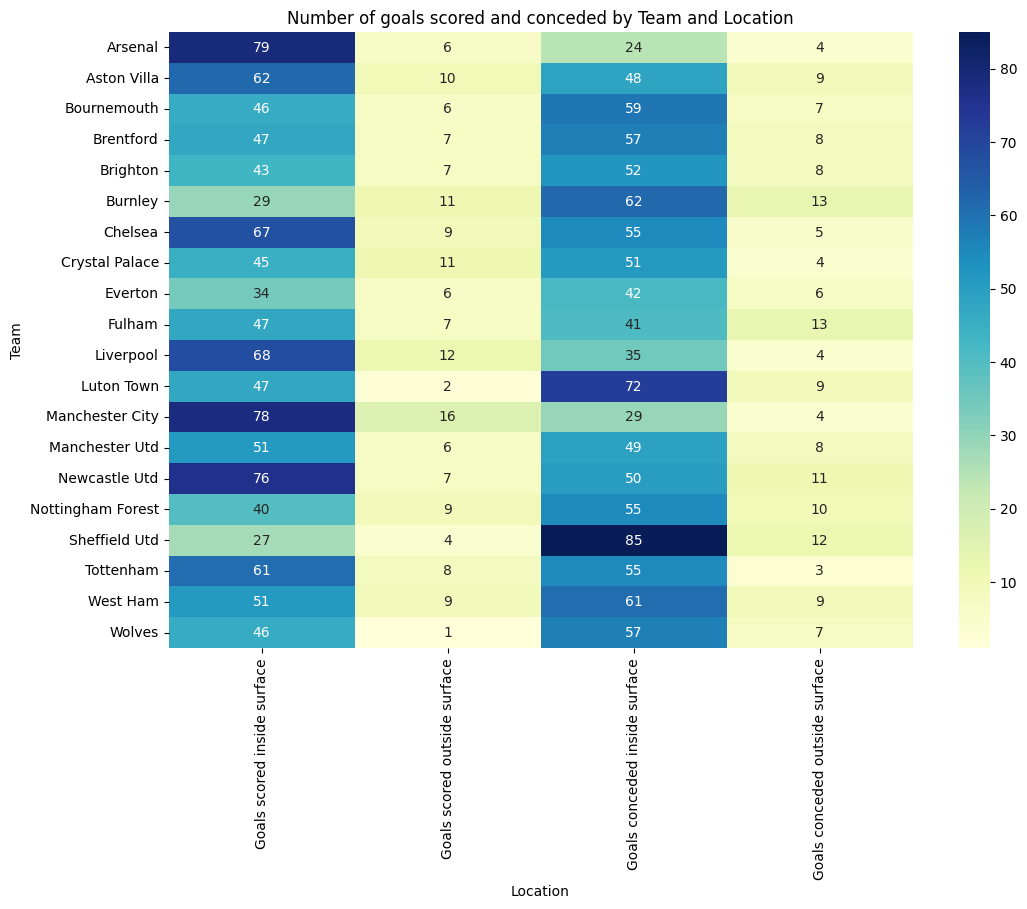

In [90]:
# Reorder columns in specific order
columns_order_distance = ['Goals scored inside surface', 'Goals scored outside surface',
                 'Goals conceded inside surface', 'Goals conceded outside surface']
distance_goals_only_count_location = distance_goals[['Team'] + columns_order_distance]

# Use seaborn library to create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_goals_only_count_location.set_index('Team'), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Number of goals scored and conceded by Team and Location')
plt.xlabel('Location')
plt.ylabel('Team')
plt.show()

In [91]:
overview_teams_goals = pd.merge(teams_goals, distance_goals, on='Team', how='outer')
overview_teams_goals = overview_teams_goals[['Team', 'Goals scored', 'Avg distance scored', 'Goals scored outside surface', 'Goals scored inside surface', 'Diff', 'Goals conceded', 'Avg distance conceded', 'Goals conceded outside surface', 'Goals conceded inside surface']].rename_axis(None, axis=1)
overview_teams_goals = overview_teams_goals.sort_values(by='Goals scored', ascending=False)
overview_teams_goals

,Team,Goals scored,Avg distance scored,Goals scored outside surface,Goals scored inside surface,Diff,Goals conceded,Avg distance conceded,Goals conceded outside surface,Goals conceded inside surface
0,Manchester City,96,11.935838,16,78,62,34,10.612582,4,29
1,Arsenal,91,10.542494,6,79,62,29,10.646229,4,24
2,Liverpool,86,10.721340,12,68,45,41,11.465169,4,35
3,Newcastle Utd,85,9.992299,7,76,23,62,10.912839,11,50
4,Chelsea,77,11.213432,9,67,14,63,10.972800,5,55
5,Aston Villa,76,10.960100,10,62,15,61,10.924674,9,48
6,Tottenham,74,10.257183,8,61,13,61,10.184524,3,55
7,West Ham,62,10.911840,9,51,-12,74,11.155680,9,61
8,Crystal Palace,57,11.511643,11,45,-1,58,9.809018,4,51
9,Manchester Utd,57,12.256168,6,51,-1,58,10.844463,8,49


### Goals analysis - Action type

In [92]:
# Selecting subsets of the dataframe based on the type of event ('For' or 'Against') and the motion type (e.g., 'In Game', 'Set Piece')
in_game_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Motion'] == 'In Game')]
set_piece_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Motion'] == 'Set Piece')]
penalty_kick_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Motion'] == 'Penalty Kick')]
free_kick_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Motion'] == 'Free Kick')]
in_game_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Motion'] == 'In Game')]
set_piece_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Motion'] == 'Set Piece')]
penalty_kick_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Motion'] == 'Penalty Kick')]
free_kick_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Motion'] == 'Free Kick')]

# Counting occurrences for each team-motion combination
in_game_for_counts = in_game_for.groupby('Team').size().reset_index(name='In Game For')
set_piece_for_counts = set_piece_for.groupby('Team').size().reset_index(name='Set Piece For')
penalty_kick_for_counts = penalty_kick_for.groupby('Team').size().reset_index(name='Penalty Kick For')
free_kick_for_counts = free_kick_for.groupby('Team').size().reset_index(name='Free Kick For')
in_game_against_counts = in_game_against.groupby('Team').size().reset_index(name='In Game Against')
set_piece_against_counts = set_piece_against.groupby('Team').size().reset_index(name='Set Piece Against')
penalty_kick_against_counts = penalty_kick_against.groupby('Team').size().reset_index(name='Penalty Kick Against')
free_kick_against_counts = free_kick_against.groupby('Team').size().reset_index(name='Free Kick Against')

# Merging the results to have a single DataFrame with teams as rows
goals_motion_type_teams = pd.merge(in_game_for_counts, set_piece_for_counts, on='Team', how='outer')
goals_motion_type_teams = pd.merge(goals_motion_type_teams, penalty_kick_for_counts, on='Team', how='outer')
goals_motion_type_teams = pd.merge(goals_motion_type_teams, free_kick_for_counts, on='Team', how='outer')
goals_motion_type_teams = pd.merge(goals_motion_type_teams, in_game_against_counts, on='Team', how='outer')
goals_motion_type_teams = pd.merge(goals_motion_type_teams, set_piece_against_counts, on='Team', how='outer')
goals_motion_type_teams = pd.merge(goals_motion_type_teams, penalty_kick_against_counts, on='Team', how='outer')
goals_motion_type_teams = pd.merge(goals_motion_type_teams, free_kick_against_counts, on='Team', how='outer')

# Replacing missing values with 0
goals_motion_type_teams = goals_motion_type_teams.fillna(0)

# Converting columns to integer type
goals_motion_type_teams['In Game For'] = goals_motion_type_teams['In Game For'].astype(int)
goals_motion_type_teams['Set Piece For'] = goals_motion_type_teams['Set Piece For'].astype(int)
goals_motion_type_teams['Penalty Kick For'] = goals_motion_type_teams['Penalty Kick For'].astype(int)
goals_motion_type_teams['Free Kick For'] = goals_motion_type_teams['Free Kick For'].astype(int)
goals_motion_type_teams['In Game Against'] = goals_motion_type_teams['In Game Against'].astype(int)
goals_motion_type_teams['Set Piece Against'] = goals_motion_type_teams['Set Piece Against'].astype(int)
goals_motion_type_teams['Penalty Kick Against'] = goals_motion_type_teams['Penalty Kick Against'].astype(int)
goals_motion_type_teams['Free Kick Against'] = goals_motion_type_teams['Free Kick Against'].astype(int)

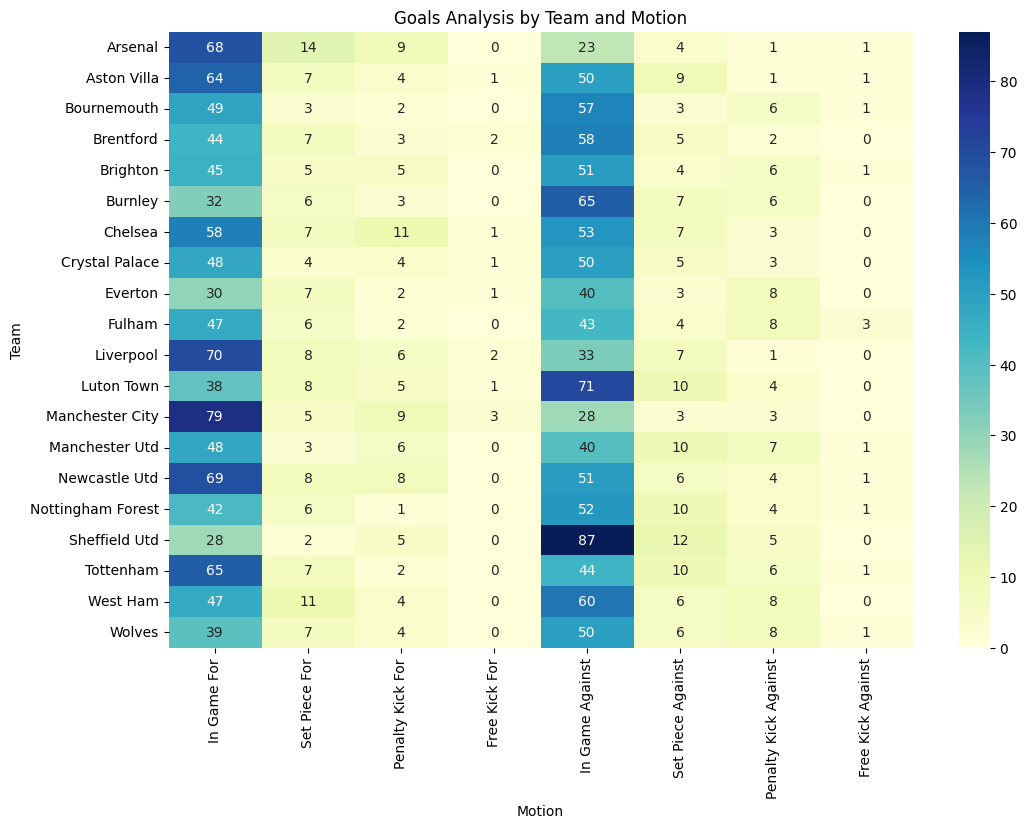

In [93]:
# Reshaping the DataFrame using pd.melt to prepare for heatmap visualization
melted_goals_motion_type_teams = pd.melt(goals_motion_type_teams, id_vars=['Team'],
                        value_vars=['In Game For', 'Set Piece For', 'Penalty Kick For', 'Free Kick For',
                                    'In Game Against', 'Set Piece Against', 'Penalty Kick Against', 'Free Kick Against'],
                        var_name='Motion', value_name='Goals')

# Creating a pivot table from the melted DataFrame to structure the data for heatmap plotting
heatmap_data = melted_goals_motion_type_teams.pivot_table(index='Team', columns='Motion', values='Goals')

# Reordering columns to match the original order
columns_order = ['In Game For', 'Set Piece For', 'Penalty Kick For', 'Free Kick For',
                 'In Game Against', 'Set Piece Against', 'Penalty Kick Against', 'Free Kick Against']
heatmap_data = heatmap_data[columns_order]

# Converting data to integer type
heatmap_data = heatmap_data.astype(int)

# Plotting the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='')
plt.title('Goals Analysis by Team and Motion')
plt.xlabel('Motion')
plt.ylabel('Team')
plt.show()

### Goals analysis - Body part

In [94]:
# Selecting subsets of the dataframe based on the type of event ('For' or 'Against') and the body part involved in scoring
foot_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & ((premiereleaguegoals['Body Part'] == 'Left Foot') | (premiereleaguegoals['Body Part'] == 'Right Foot'))]
other_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Body Part'] == 'Other')]
head_for = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Body Part'] == 'Head')]
foot_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & ((premiereleaguegoals['Body Part'] == 'Left Foot') | (premiereleaguegoals['Body Part'] == 'Right Foot'))]
other_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Body Part'] == 'Other')]
head_against = premiereleaguegoals[(premiereleaguegoals['Type'] == 'Against') & (premiereleaguegoals['Body Part'] == 'Head')]

# Counting occurrences for each team-body part combination
foot_for_counts = foot_for.groupby('Team').size().reset_index(name='Foot For')
other_for_counts = other_for.groupby('Team').size().reset_index(name='Other For')
head_for_counts = head_for.groupby('Team').size().reset_index(name='Head For')
foot_against_counts = foot_against.groupby('Team').size().reset_index(name='Foot Against')
other_against_counts = other_against.groupby('Team').size().reset_index(name='Other Against')
head_against_counts = head_against.groupby('Team').size().reset_index(name='Head Against')

# Merging the results to have a single DataFrame with teams as rows
goals_bodypart_type_teams = pd.merge(foot_for_counts, other_for_counts, on='Team', how='outer')
goals_bodypart_type_teams = pd.merge(goals_bodypart_type_teams, head_for_counts, on='Team', how='outer')
goals_bodypart_type_teams = pd.merge(goals_bodypart_type_teams, foot_against_counts, on='Team', how='outer')
goals_bodypart_type_teams = pd.merge(goals_bodypart_type_teams, other_against_counts, on='Team', how='outer')
goals_bodypart_type_teams = pd.merge(goals_bodypart_type_teams, head_against_counts, on='Team', how='outer')

# Replacing missing values with 0
goals_bodypart_type_teams = goals_bodypart_type_teams.fillna(0)

# Converting columns to integer type
goals_bodypart_type_teams['Foot For'] = goals_bodypart_type_teams['Foot For'].astype(int)
goals_bodypart_type_teams['Other For'] = goals_bodypart_type_teams['Other For'].astype(int)
goals_bodypart_type_teams['Head For'] = goals_bodypart_type_teams['Head For'].astype(int)
goals_bodypart_type_teams['Foot Against'] = goals_bodypart_type_teams['Foot Against'].astype(int)
goals_bodypart_type_teams['Other Against'] = goals_bodypart_type_teams['Other Against'].astype(int)
goals_bodypart_type_teams['Head Against'] = goals_bodypart_type_teams['Head Against'].astype(int)

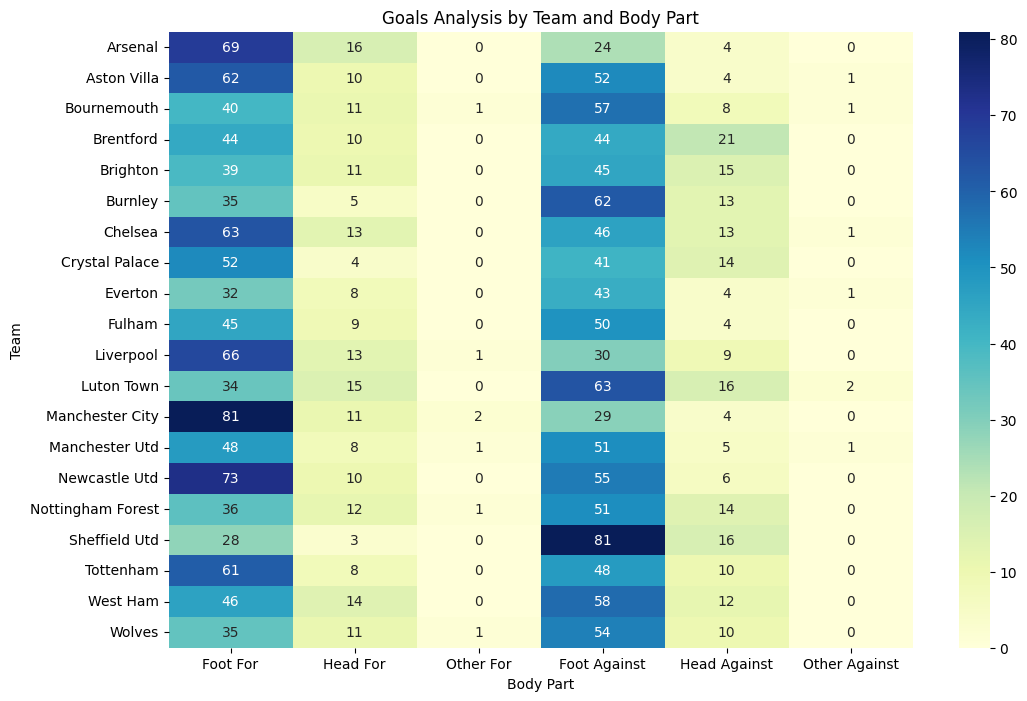

In [95]:
# Reshaping the DataFrame using pd.melt to prepare for heatmap visualization
melted_goals_bodypart_type_teams = pd.melt(goals_bodypart_type_teams, id_vars=['Team'],
                        value_vars=['Foot For', 'Other For', 'Head For',
                                    'Foot Against', 'Other Against', 'Head Against'],
                        var_name='Body Part', value_name='Goals')

# Creating a pivot table from the melted DataFrame to structure the data for heatmap plotting
heatmap_data_bodypart = melted_goals_bodypart_type_teams.pivot_table(index='Team', columns='Body Part', values='Goals')

# Reordering columns to match the original order
columns_order = ['Foot For', 'Head For', 'Other For', 'Foot Against', 'Head Against', 'Other Against']
heatmap_data_bodypart = heatmap_data_bodypart[columns_order]

# Converting data to integer type
heatmap_data_bodypart = heatmap_data_bodypart.astype(int)

# Plotting the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_bodypart, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Goals Analysis by Team and Body Part')
plt.xlabel('Body Part')
plt.ylabel('Team')
plt.show()

### Goals analysis - Home/Away

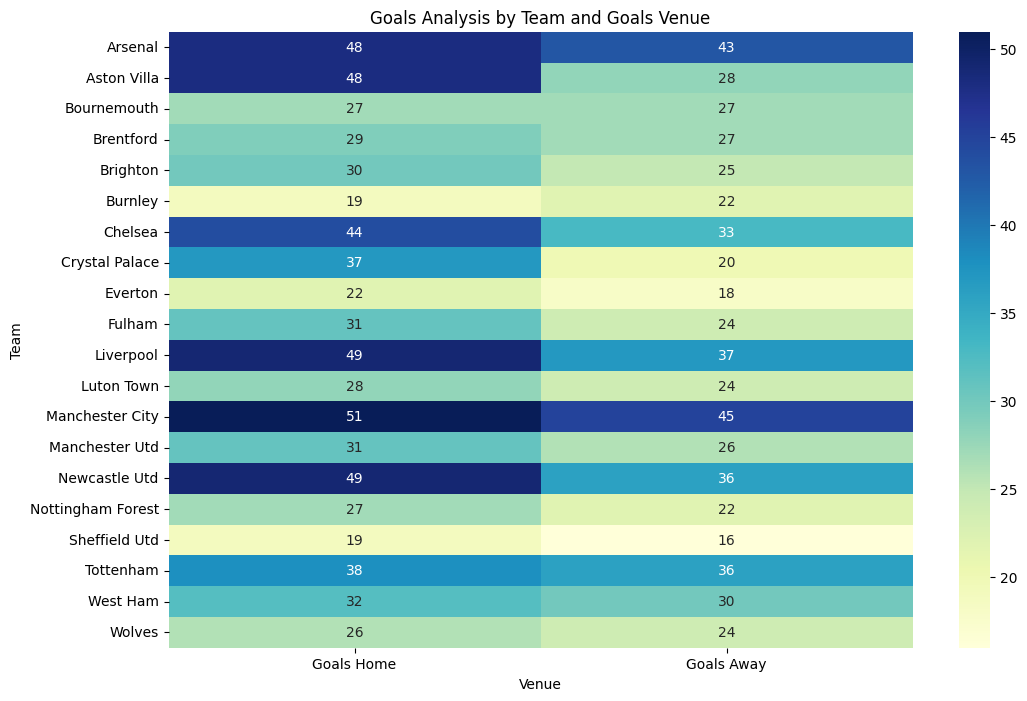

In [96]:
# Filter goals scored by teams at home and away venues
goals_home = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Venue'] == 'Home')]
goals_away = premiereleaguegoals[(premiereleaguegoals['Type'] == 'For') & (premiereleaguegoals['Venue'] == 'Away')]

# Count the number of goals scored by each team at home and away venues
goals_home_counts = goals_home.groupby('Team').size().reset_index(name='Goals Home')
goals_away_counts = goals_away.groupby('Team').size().reset_index(name='Goals Away')

# Merge the counts of goals scored at home and away venues for each team
goals_venue_teams = pd.merge(goals_home_counts, goals_away_counts, on='Team', how='outer')
goals_venue_teams = goals_venue_teams.fillna(0)

# Convert the counts to integers
goals_venue_teams['Goals Home'] = goals_venue_teams['Goals Home'].astype(int)
goals_venue_teams['Goals Away'] = goals_venue_teams['Goals Away'].astype(int)

# Reshape the data for visualization
melted_goals_venue_teams = pd.melt(goals_venue_teams, id_vars=['Team'],
                                    value_vars=['Goals Home', 'Goals Away'],
                                    var_name='Goals Venue', value_name='Goals')

# Create a pivot table for heatmap visualization
heatmap_data_venue = melted_goals_venue_teams.pivot_table(index='Team', columns='Goals Venue', values='Goals')

# Specify the order of columns
columns_order = ['Goals Home', 'Goals Away']
heatmap_data_venue = heatmap_data_venue[columns_order]

# Convert the data to integers
heatmap_data_venue = heatmap_data_venue.astype(int)

# Create and display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_venue, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Goals Analysis by Team and Goals Venue')
plt.xlabel('Venue')
plt.ylabel('Team')
plt.show()

### Best offense

In [97]:
print(f"{teamsoverall.loc[teamsoverall['GF'].idxmax(), 'Team']} with {teamsoverall['GF'].max()} goals scored")

Manchester City with 96 goals scored


#### Home

In [98]:
print(f"{teamshomeaway.loc[teamshomeaway['GF Home'].idxmax(), 'Team']} with {teamshomeaway['GF Home'].max()} goals scored")

Manchester City with 51 goals scored


#### Away

In [99]:
print(f"{teamshomeaway.loc[teamshomeaway['GF Away'].idxmax(), 'Team']} with {teamshomeaway['GF Away'].max()} goals scored")

Manchester City with 45 goals scored


### Best defense

In [100]:
print(f"{teamsoverall.loc[teamsoverall['GA'].idxmin(), 'Team']} with {teamsoverall['GA'].min()} goals conceded")

Arsenal with 29 goals conceded


#### Home

In [101]:
print(f"{teamshomeaway.loc[teamshomeaway['GA Home'].idxmin(), 'Team']} with {teamshomeaway['GA Home'].min()} goals conceded")

Manchester City with 16.0 goals conceded


#### Away

In [102]:
print(f"{teamshomeaway.loc[teamshomeaway['GA Away'].idxmin(), 'Team']} with {teamshomeaway['GA Away'].min()} goals conceded")

Arsenal with 13.0 goals conceded


### Results - Home/Away

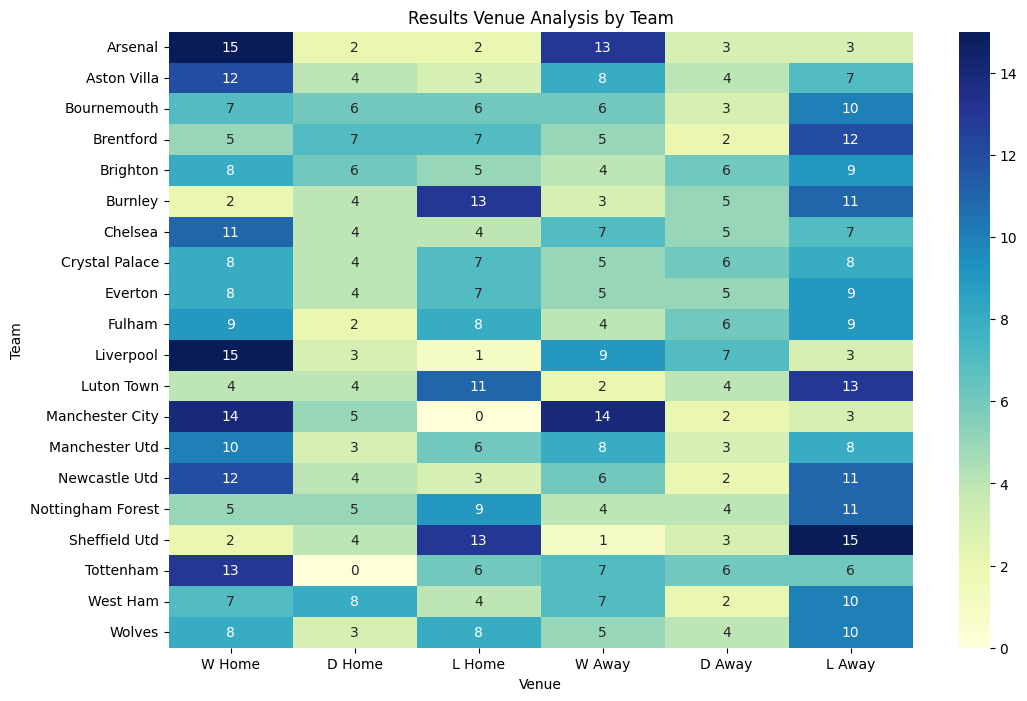

In [103]:
# Select relevant columns from the dataframe
results_venue_teams = teamshomeaway[['Team', 'MP Home', 'W Home', 'D Home', 'L Home', 'MP Away', 'W Away', 'D Away', 'L Away']]

# Reshape the dataframe for visualization
melted_results_venue_teams = pd.melt(results_venue_teams, id_vars=['Team'],
                                    value_vars=['MP Home', 'W Home', 'D Home', 'L Home', 'MP Away', 'W Away', 'D Away', 'L Away'],
                                    var_name='Results Venue', value_name='Results')

# Create a pivot table for heatmap visualization
heatmap_data_results_venue = melted_results_venue_teams.pivot_table(index='Team', columns='Results Venue', values='Results')

# Specify the order of columns
columns_order = ['W Home', 'D Home', 'L Home', 'W Away', 'D Away', 'L Away']
heatmap_data_results_venue = heatmap_data_results_venue[columns_order]

# Convert the data to integers
heatmap_data_results_venue = heatmap_data_results_venue.astype(int)

# Create and display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_results_venue, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Results Venue Analysis by Team')
plt.xlabel('Venue')
plt.ylabel('Team')
plt.show()

💡 W = win / D = draw / L = lose

### Search the scored goals of a team

In [104]:
team_searched = 'Arsenal'

In [105]:
searching_team = premiereleaguegoals[(premiereleaguegoals['Team'] == team_searched) & (premiereleaguegoals['Type'] == 'For')].drop(['Goalkeeper', 'Note'], axis=1)
searching_team

,Team,Type,Rank,Date,Round,Venue,Scorer,Opponent,Start,xG,PSxG,Body Part,Distance,Minute,Assist,GCA1,Type GCA1,GCA2,Type GCA2,Motion
1,Arsenal,For,1,12/08/2023,Matchweek 1,Home,Eddie Nketiah,Nottingham Forest,Starting,0.11,0.02,Right Foot,12.8016,26,Martinelli,Martinelli,Take-On,Thomas Partey,Pass (Live),In Game
2,Arsenal,For,2,12/08/2023,Matchweek 1,Home,Bukayo Saka,Nottingham Forest,Starting,0.04,0.60,Left Foot,21.0312,32,William Saliba,William Saliba,Pass (Live),Thomas Partey,Pass (Live),In Game
56,Arsenal,For,19,28/10/2023,Matchweek 10,Home,Eddie Nketiah,Sheffield Utd,Starting,0.75,0.96,Right Foot,8.2296,28,Declan Rice,Eddie Nketiah,Take-On,Bukayo Saka,Pass (Live),In Game
57,Arsenal,For,20,28/10/2023,Matchweek 10,Home,Eddie Nketiah,Sheffield Utd,Starting,0.12,0.75,Right Foot,5.4864,50,NaN,Emile Smith Rowe,Pass (Dead),Eddie Nketiah,Fouled,Set Piece
58,Arsenal,For,21,28/10/2023,Matchweek 10,Home,Eddie Nketiah,Sheffield Utd,Starting,0.04,0.34,Right Foot,23.7744,58,Emile Smith Rowe,Emile Smith Rowe,Pass (Live),Gabriel Martinelli,Pass (Live),In Game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,Arsenal,For,87,04/05/2024,Matchweek 36,Home,Leandro Trossard,Bournemouth,Starting,0.13,0.11,Right Foot,12.8016,70,Declan Rice,Declan Rice,Pass (Live),Kai Havertz,Pass (Live),In Game
2257,Arsenal,For,88,04/05/2024,Matchweek 36,Home,Declan Rice,Bournemouth,Starting,0.12,0.03,Right Foot,8.2296,90+7,Gabriel Jesus,Gabriel Jesus,Pass (Live),Martin Ødegaard,Pass (Live),In Game
2416,Arsenal,For,89,12/05/2024,Matchweek 37,Away,Leandro Trossard,Manchester Utd,Starting,0.50,0.98,Right Foot,2.7432,20,Kai Havertz,Kai Havertz,Pass (Live),Ben White,Pass (Live),In Game
2417,Arsenal,For,90,19/05/2024,Matchweek 38,Home,Takehiro Tomiyasu,Everton,Starting,0.08,0.22,Right Foot,14.6304,43,Martin Ødegaard,Martin Ødegaard,Pass (Live),Ben White,Pass (Live),In Game


### Cards distribution

In [106]:
teams_cards = teamsmisc[['Team', 'CrdY', 'CrdR']]
teams_cards = teams_cards.sort_values(by=['CrdY', 'CrdR'], ascending=[False, False]).reset_index(drop=True)
teams_cards

,Team,CrdY,CrdR
0,Chelsea,109,4
1,Wolves,102,4
2,Sheffield Utd,101,5
3,Aston Villa,94,2
4,Tottenham,92,4
5,Brighton,90,3
6,Brentford,89,2
7,Fulham,84,4
8,Manchester Utd,83,1
9,Nott'ham Forest,82,3


### Aerial duels %won

In [107]:
aerial_duels = teamsmisc[['Team', 'Won%', 'Won', 'Lost']]
aerial_duels = aerial_duels.sort_values(by="Won%", ascending=False).reset_index(drop=True)
aerial_duels

,Team,Won%,Won,Lost
0,Liverpool,56.9,582,441
1,Brighton,54.2,405,342
2,Everton,54.0,676,577
3,Manchester City,52.9,324,288
4,Chelsea,52.3,439,401
5,Newcastle Utd,51.8,450,418
6,Nott'ham Forest,51.3,582,553
7,Brentford,51.0,632,607
8,West Ham,50.3,576,569
9,Arsenal,50.2,503,499


### Correlation between goals scored and points won per match

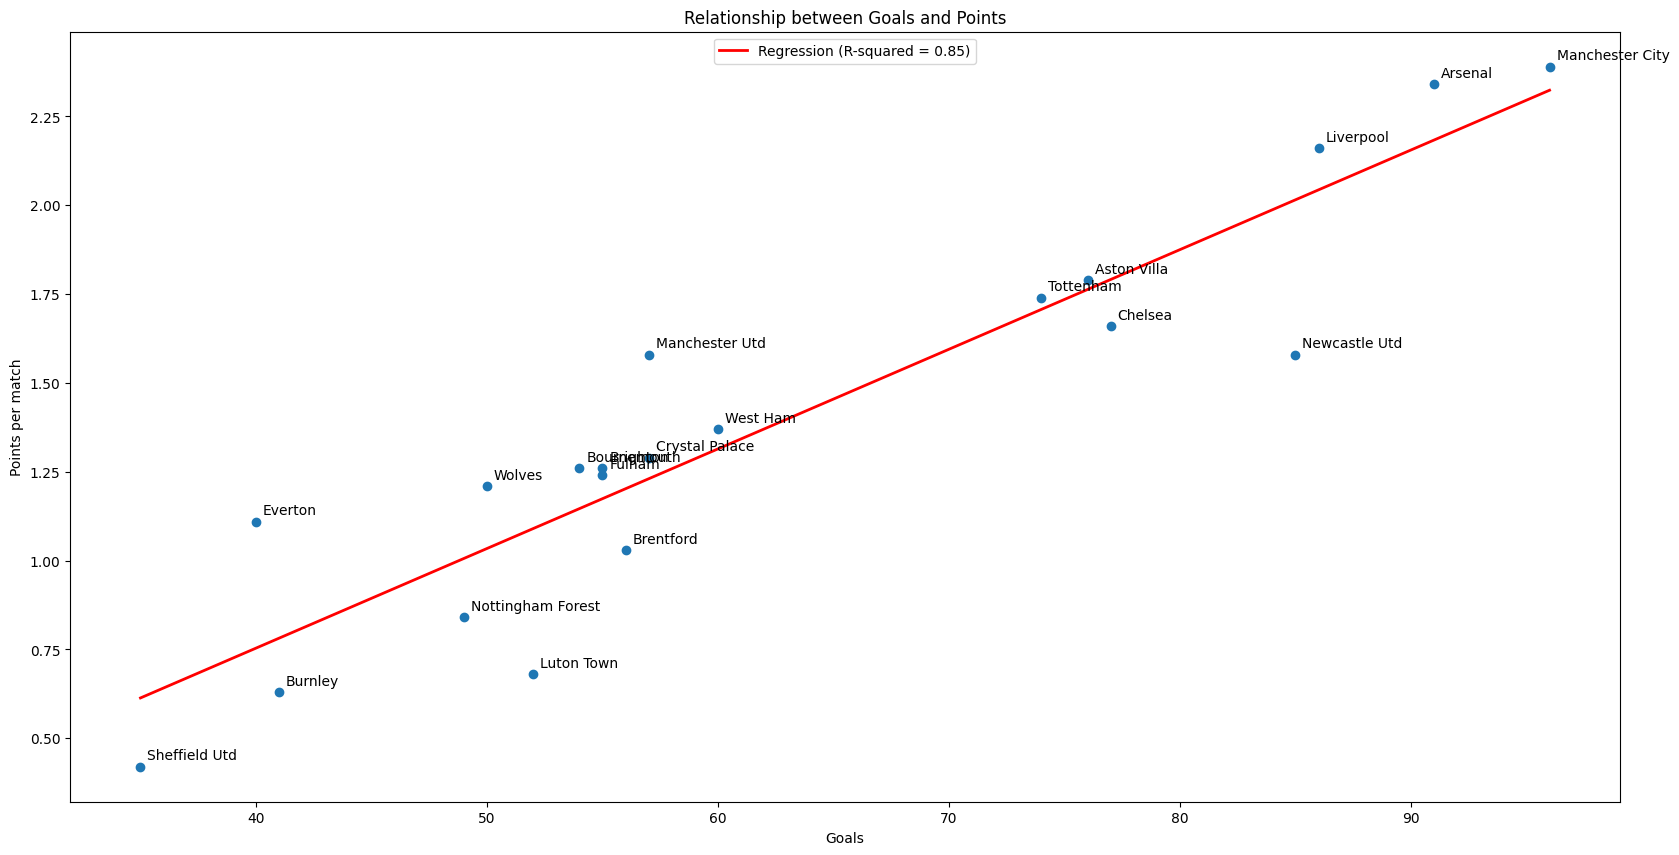

In [130]:
# Specify the figure size
plt.figure(figsize=(20, 10)) # Adjust dimensions according to your preferences

# Scatter plot of goals scored (GF) vs points per match (Pts/MP)
plt.scatter(teamsoverall['GF'], teamsoverall['Pts/MP'])
plt.xlabel('Goals')
plt.ylabel('Points per match')
plt.title('Relationship between Goals and Points')

# Perform linear regression
X = teamsoverall['GF'].values.reshape(-1, 1)
y = teamsoverall['Pts/MP'].values
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

# Plot the regression line
plt.plot(teamsoverall['GF'], y_pred, color='red', linewidth=2, label=f'Regression (R-squared = {r2:.2f})')

# Add team names as annotations for each point
for i, team in enumerate(teamsoverall['Team']):
    plt.annotate(team,
                 (teamsoverall['GF'].values[i], teamsoverall['Pts/MP'].values[i]),
                 textcoords="offset points",
                 xytext=(5, 5))

# Legend to indicate the data and regression
plt.legend(loc='upper center')

# Display the plot
plt.show()

### Effectiveness category

In [109]:
# Determine the category of a team based on its offensive and defensive efficiency.
def determine_category(row):
    if row['offensive efficiency'] > 0 and row['defensive efficiency'] < 0:
        return "The Efficient"
    elif row['offensive efficiency'] < 0 and row['defensive efficiency'] > 0:
        return "The Strugglers"
    elif row['offensive efficiency'] >= 0 and row['defensive efficiency'] >= 0:
        return "The Prolific"
    elif row['offensive efficiency'] <= 0 and row['defensive efficiency'] <= 0:
        return "The Resolute"
    else:
        return "The Neutral"

# Apply the function to each row in the DataFrame
teamsoverall['Category'] = teamsoverall.apply(determine_category, axis=1)


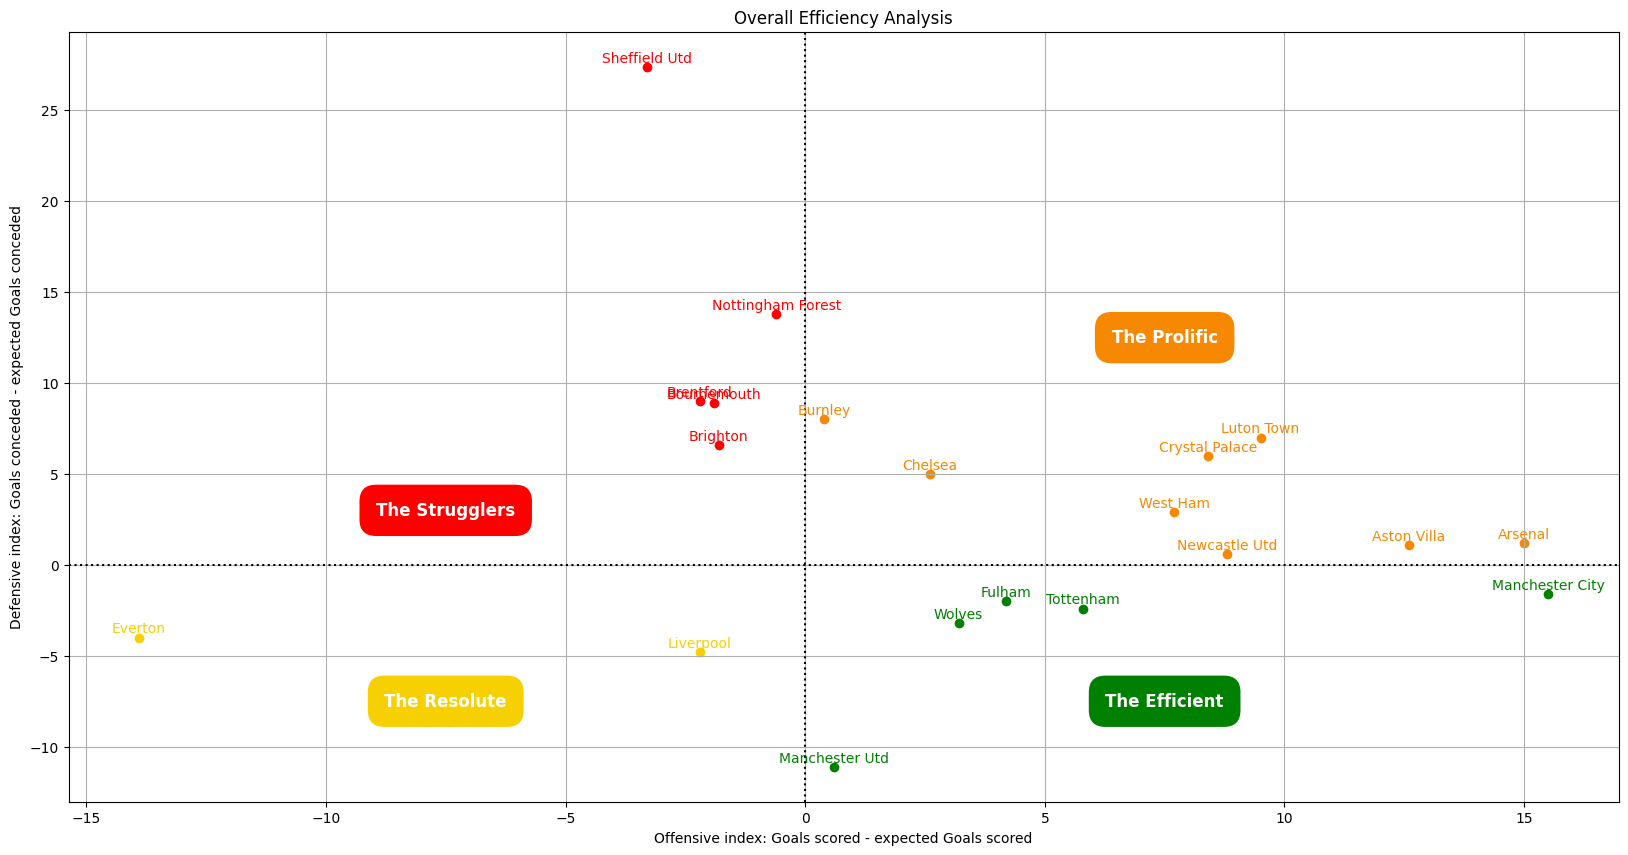

In [110]:
plt.figure(figsize=(20, 10))

for index, row in teamsoverall.iterrows():
    team = row['Team']
    offensive_efficiency = row['offensive efficiency']
    defensive_efficiency = row['defensive efficiency']

    # Plotting different categories with different colors
    if offensive_efficiency == 0 and defensive_efficiency == 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='black')
        plt.text(offensive_efficiency + 0.1, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='black')
    elif offensive_efficiency > 0 and defensive_efficiency < 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='green')
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='green')
    elif offensive_efficiency < 0 and defensive_efficiency > 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='red')
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='red')
    elif offensive_efficiency >= 0 and defensive_efficiency >= 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='#F78902') #orange
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='#F78902')
    elif offensive_efficiency <= 0 and defensive_efficiency <= 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='#F7D002') #gold
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='#F7D002')
    else:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='black')

# Annotating the categories
plt.annotate("The Resolute", (-7.5, -7.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F7D002", ec="none"), weight='bold')
plt.annotate("The Efficient", (7.5, -7.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="green", ec="none"), weight='bold')
plt.annotate("The Prolific", (7.5, 12.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F78902", ec="none"), weight='bold')
plt.annotate("The Strugglers", (-7.5, 3), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="red", ec="none"), weight='bold')

# Adding labels and title
plt.xlabel('Offensive index: Goals scored - expected Goals scored')
plt.ylabel('Defensive index: Goals conceded - expected Goals conceded')
plt.title('Overall Efficiency Analysis')

# Adding grid lines and axes
plt.axhline(0, color='black', linestyle=':')
plt.axvline(0, color='black', linestyle=':')
plt.grid(True)

# Displaying the plot
plt.show()

#### Home

In [111]:
teamshomeaway['offensive efficiency Home'] = teamshomeaway['GF Home'] - teamshomeaway['xG Home'] # if positive, then effective
teamshomeaway['offensive efficiency Away'] = teamshomeaway['GF Away'] - teamshomeaway['xG Away'] # if positive, then effective
teamshomeaway['defensive efficiency Home'] = teamshomeaway['GA Home'] - teamshomeaway['xGA Home'] # if negative, then effective
teamshomeaway['defensive efficiency Away'] = teamshomeaway['GA Away'] - teamshomeaway['xGA Away'] # if negative, then effective

In [112]:
# Function to determine the category of a home team based on offensive and defensive efficiencies
def determine_category_home(row):
    # If both offensive and defensive efficiencies are positive
    if row['offensive efficiency Home'] > 0 and row['defensive efficiency Home'] < 0:
        return "The Efficient"
    # If both offensive and defensive efficiencies are negative
    elif row['offensive efficiency Home'] < 0 and row['defensive efficiency Home'] > 0:
        return "The Strugglers"
    # If offensive efficiency is non-negative and defensive efficiency is non-positive
    elif row['offensive efficiency Home'] >= 0 and row['defensive efficiency Home'] >= 0:
        return "The Prolific"
    # If offensive efficiency is non-positive and defensive efficiency is non-negative
    elif row['offensive efficiency Home'] <= 0 and row['defensive efficiency Home'] <= 0:
        return "The Resolute"
    # If neither of the above conditions are met
    else:
        return "The Neutral"

# Function to determine the category of an away team based on offensive and defensive efficiencies
def determine_category_away(row):
    # If both offensive and defensive efficiencies are positive
    if row['offensive efficiency Away'] > 0 and row['defensive efficiency Away'] < 0:
        return "The Efficient"
    # If both offensive and defensive efficiencies are negative
    elif row['offensive efficiency Away'] < 0 and row['defensive efficiency Away'] > 0:
        return "The Strugglers"
    # If offensive efficiency is non-negative and defensive efficiency is non-positive
    elif row['offensive efficiency Away'] >= 0 and row['defensive efficiency Away'] >= 0:
        return "The Prolific"
    # If offensive efficiency is non-positive and defensive efficiency is non-negative
    elif row['offensive efficiency Away'] <= 0 and row['defensive efficiency Away'] <= 0:
        return "The Resolute"
    # If neither of the above conditions are met
    else:
        return "The Neutral"

# Applying the determine_category_home function to each row in the dataframe and storing the result in a new column
teamshomeaway['Category Home'] = teamshomeaway.apply(determine_category_home, axis=1)

# Applying the determine_category_away function to each row in the dataframe and storing the result in a new column
teamshomeaway['Category Away'] = teamshomeaway.apply(determine_category_away, axis=1)

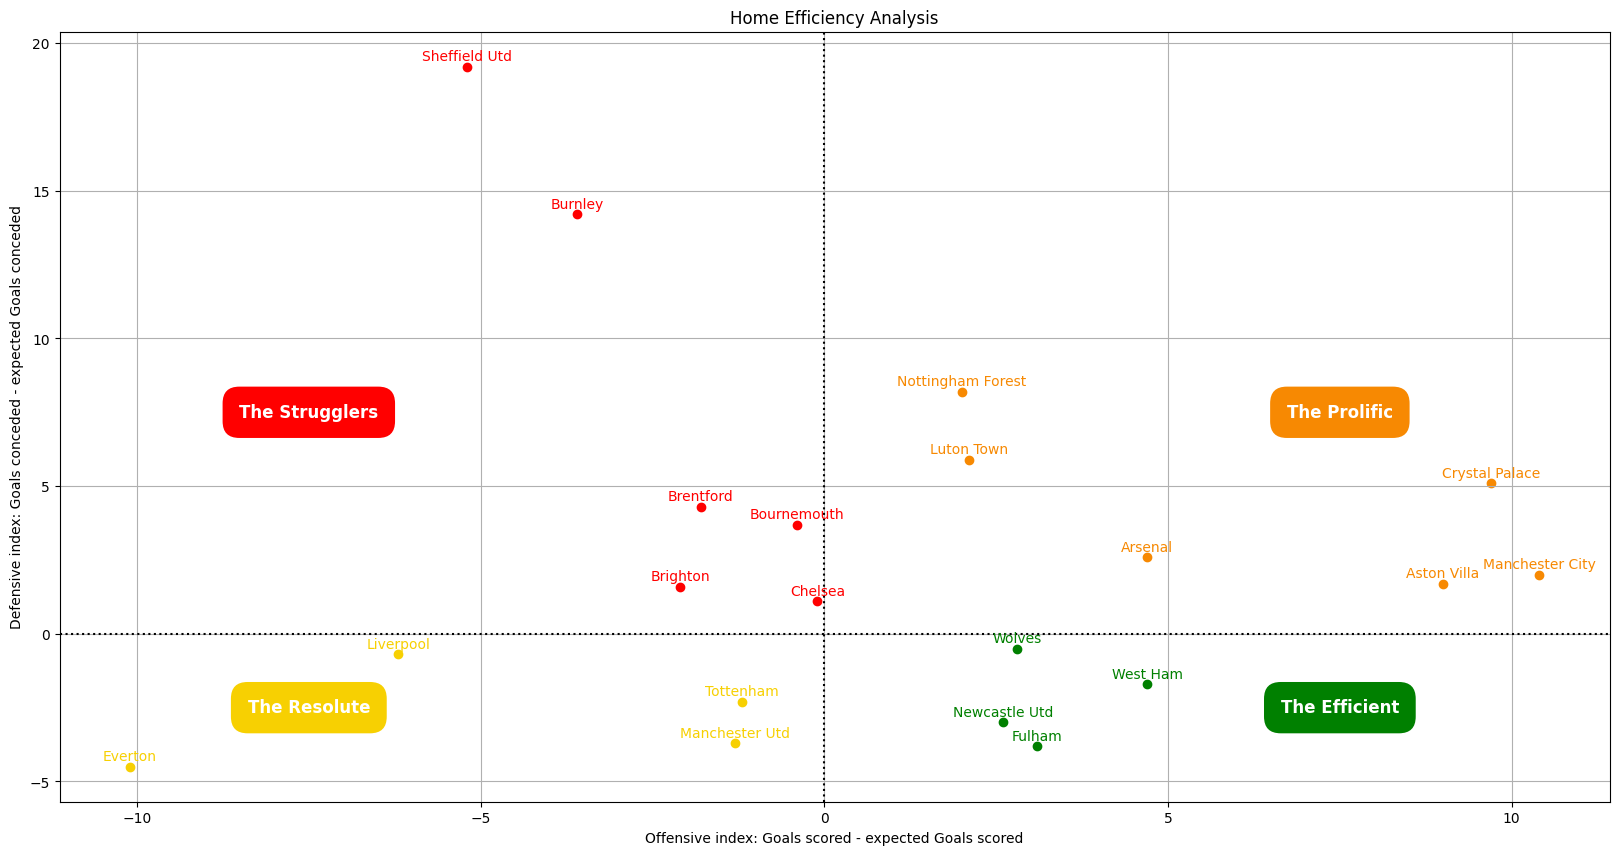

In [113]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Iterate over each row in the dataframe
for index, row in teamshomeaway.iterrows():
    # Extract relevant data for plotting
    team = row['Team']
    offensive_efficiency = row['offensive efficiency Home']
    defensive_efficiency = row['defensive efficiency Home']

    # Plotting based on different conditions
    if offensive_efficiency == 0 and defensive_efficiency == 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='black')
        plt.text(offensive_efficiency + 0.1, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='black')
    elif offensive_efficiency > 0 and defensive_efficiency < 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='green')
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='green')
    elif offensive_efficiency < 0 and defensive_efficiency > 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='red')
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='red')
    elif offensive_efficiency >= 0 and defensive_efficiency >= 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='#F78902') #orange
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='#F78902')
    elif offensive_efficiency <= 0 and defensive_efficiency <= 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='#F7D002') #gold
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='#F7D002')
    else:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='black')

# Annotations for categories
plt.annotate("The Resolute", (-7.5, -2.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F7D002", ec="none"), weight='bold')
plt.annotate("The Efficient", (7.5, -2.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="green", ec="none"), weight='bold')
plt.annotate("The Prolific", (7.5, 7.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F78902", ec="none"), weight='bold')
plt.annotate("The Strugglers", (-7.5, 7.5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="red", ec="none"), weight='bold')

# Labels and title
plt.xlabel('Offensive index: Goals scored - expected Goals scored')
plt.ylabel('Defensive index: Goals conceded - expected Goals conceded')
plt.title('Home Efficiency Analysis')

# Add horizontal and vertical lines at 0
plt.axhline(0, color='black', linestyle=':')
plt.axvline(0, color='black', linestyle=':')

# Add grid
plt.grid(True)

# Show plot
plt.show()

#### Away

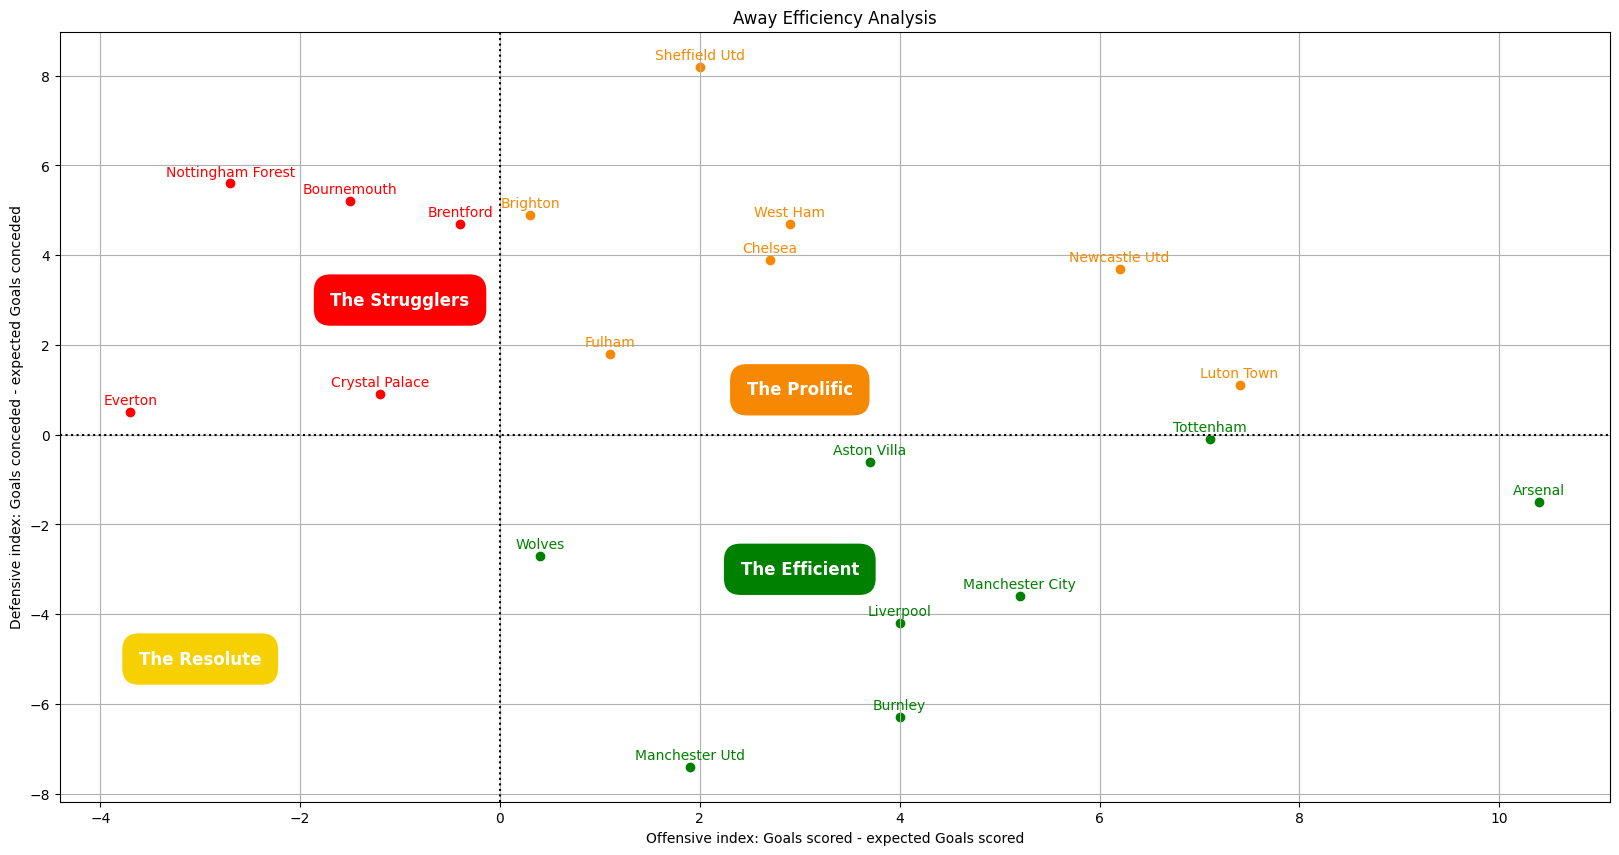

In [114]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Iterate over each row in the dataframe
for index, row in teamshomeaway.iterrows():
    # Extract relevant data for plotting
    team = row['Team']
    offensive_efficiency = row['offensive efficiency Away']
    defensive_efficiency = row['defensive efficiency Away']

    # Plotting based on different conditions
    if offensive_efficiency == 0 and defensive_efficiency == 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='black')
        plt.text(offensive_efficiency + 0.1, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='black')
    elif offensive_efficiency > 0 and defensive_efficiency < 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='green')
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='green')
    elif offensive_efficiency < 0 and defensive_efficiency > 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='red')
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='red')
    elif offensive_efficiency >= 0 and defensive_efficiency >= 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='#F78902') #orange
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='#F78902')
    elif offensive_efficiency <= 0 and defensive_efficiency <= 0:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='#F7D002') #gold
        plt.text(offensive_efficiency, defensive_efficiency + 0.1, team, fontsize=10, ha='center', va='bottom', color='#F7D002')
    else:
        plt.scatter(offensive_efficiency, defensive_efficiency, label=team, color='black')

# Annotations for categories
plt.annotate("The Resolute", (-3, -5), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F7D002", ec="none"), weight='bold')
plt.annotate("The Efficient", (3, -3), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="green", ec="none"), weight='bold')
plt.annotate("The Prolific", (3, 1), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="#F78902", ec="none"), weight='bold')
plt.annotate("The Strugglers", (-1, 3), fontsize=12, color='white', ha='center', va='center', bbox=dict(boxstyle='round, pad=1', fc="red", ec="none"), weight='bold')

# Labels and title
plt.xlabel('Offensive index: Goals scored - expected Goals scored')
plt.ylabel('Defensive index: Goals conceded - expected Goals conceded')
plt.title('Away Efficiency Analysis')

# Add horizontal and vertical lines at 0
plt.axhline(0, color='black', linestyle=':')
plt.axvline(0, color='black', linestyle=':')

# Add grid
plt.grid(True)

# Show plot
plt.show()

### Difficulty Index (no more available)

💡 The aim is to create a fixture difficulty index for each team, depending which opponent it faces through the matchweeks. Doing so, we are taking into account the forms of the teams, because the difficulty index changes depending the ranking of the team.

#### First, choose the gameweeks already played

In [115]:
# We keep only the days already played
matchweek_selected = 37

In [116]:
fixtures_current = fixtures[fixtures['Wk'] <= matchweek_selected]
fixtures_current

,Wk,Day,Date,Time,Home,xG Home,Score,xG Away,Away,Attendance,Venue,Referee,HomeScore,AwayScore,HomePts,AwayPts
0,1,Fri,2023-08-11,20:00(21:00),Burnley,0.3,0-3,1.9,Manchester City,21572,Turf Moor,Craig Pawson,0,3,0,3
1,1,Sat,2023-08-12,12:30(13:30),Arsenal,0.8,2-1,1.2,Nottingham Forest,59984,Emirates Stadium,Michael Oliver,2,1,3,0
2,1,Sat,2023-08-12,15:00(16:00),Everton,2.7,0-1,1.5,Fulham,39940,Goodison Park,Stuart Attwell,0,1,0,3
3,1,Sat,2023-08-12,15:00(16:00),Sheffield Utd,0.5,0-1,1.9,Crystal Palace,31194,Bramall Lane,John Brooks,0,1,0,3
4,1,Sat,2023-08-12,15:00(16:00),Brighton,4.0,4-1,1.5,Luton Town,31872,The American Express Community Stadium,David Coote,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,37,Sun,2024-05-12,16:30(17:30),Manchester Utd,0.5,0-1,1.5,Arsenal,73600,Old Trafford,Paul Tierney,0,1,0,3
366,37,Mon,2024-05-13,20:00(21:00),Aston Villa,3.1,3-3,1.7,Liverpool,42241,Villa Park,Simon Hooper,3,3,1,1
367,34,Tue,2024-05-14,20:00(21:00),Tottenham,1.7,0-2,2.4,Manchester City,61065,Tottenham Hotspur Stadium,Chris Kavanagh,0,2,0,3
368,34,Wed,2024-05-15,19:45(20:45),Brighton,1.3,1-2,1.5,Chelsea,31555,The American Express Community Stadium,Michael Salisbury,1,2,0,3


In [117]:
# Initialization of the dataframe in which we will store all the difficulty indexes for each day for each team
teams = fixtures_current['Home'].unique()
FDI_history = pd.DataFrame({'Team': teams})
FDI_history_Home = FDI_history.copy()
FDI_history_Away = FDI_history.copy()

In [118]:
# Index dictionary for the first day, as it will not be based on standings as no matches have yet been played
first_day_index = {
    'Arsenal': 2,
    'Aston Villa': 4,
    'Bournemouth': 3,
    'Brentford': 3,
    'Brighton': 2,
    'Burnley': 5,
    'Chelsea': 4,
    'Crystal Palace': 2,
    'Everton': 2,
    'Fulham': 2,
    'Liverpool': 3,
    'Luton Town': 3,
    'Manchester City': 2,
    'Manchester Utd': 2,
    'Newcastle Utd': 3,
    'Nottingham Forest': 5,
    'Sheffield Utd': 2,
    'Tottenham': 3,
    'West Ham': 2,
    'Wolves': 4
}

first_day_index_home = {
    'Arsenal': 2,
    'Aston Villa': None,
    'Bournemouth': 3,
    'Brentford': 3,
    'Brighton': 2,
    'Burnley': 5,
    'Chelsea': 4,
    'Crystal Palace': None,
    'Everton': 2,
    'Fulham': None,
    'Liverpool': None,
    'Luton Town': None,
    'Manchester City': None,
    'Manchester Utd': 2,
    'Newcastle Utd': 3,
    'Nottingham Forest': None,
    'Sheffield Utd': 2,
    'Tottenham': None,
    'West Ham': None,
    'Wolves': None
}

first_day_index_away = {
    'Arsenal': None,
    'Aston Villa': 4,
    'Bournemouth': None,
    'Brentford': None,
    'Brighton': None,
    'Burnley': None,
    'Chelsea': None,
    'Crystal Palace': 2,
    'Everton': None,
    'Fulham': 2,
    'Liverpool': 3,
    'Luton Town': 3,
    'Manchester City': 2,
    'Manchester Utd': None,
    'Newcastle Utd': None,
    'Nottingham Forest': 5,
    'Sheffield Utd': None,
    'Tottenham': 3,
    'West Ham': 2,
    'Wolves': 4
}

In [119]:
# Index allocation for each day
for wk in fixtures_current['Wk'].unique():
    # Create 'define_FDI_Home' and 'define_FDI_Away' dataframes for each day
    define_FDI_Home = fixtures_current[fixtures_current['Wk'] <= wk].groupby('Home').agg({'HomePts': 'sum', 'HomeScore': 'sum', 'AwayScore': 'sum'}).reset_index()
    define_FDI_Home.columns = ['Team', 'Pts Home', 'HomeScore', 'AwayScore']
    define_FDI_Home['GD Home'] = define_FDI_Home['HomeScore'] - define_FDI_Home['AwayScore']
    define_FDI_Home = define_FDI_Home[['Team', 'Pts Home', 'GD Home']]
    define_FDI_Home.sort_values(by=['Pts Home', 'GD Home', 'Team'], ascending=[False, False, True], inplace=True)
    define_FDI_Home.reset_index(drop=True, inplace=True)
    define_FDI_Home['Index'] = pd.cut(define_FDI_Home.index + 1, bins=[0, 2, 6, 13, 20], labels=[5, 4, 3, 2])

    define_FDI_Away = fixtures_current[fixtures_current['Wk'] <= wk].groupby('Away').agg({'AwayPts': 'sum', 'AwayScore': 'sum', 'HomeScore': 'sum'}).reset_index()
    define_FDI_Away.columns = ['Team', 'Pts Away', 'AwayScore', 'HomeScore']
    define_FDI_Away['GD Away'] = define_FDI_Away['AwayScore'] - define_FDI_Away['HomeScore']
    define_FDI_Away = define_FDI_Away[['Team', 'Pts Away', 'GD Away']]
    define_FDI_Away.sort_values(by=['Pts Away', 'GD Away', 'Team'], ascending=[False, False, True], inplace=True)
    define_FDI_Away.reset_index(drop=True, inplace=True)
    define_FDI_Away['Index'] = pd.cut(define_FDI_Away.index + 1, bins=[0, 2, 6, 13, 20], labels=[5, 4, 3, 2])

    def calculate_index(team, wk, fixtures_current, define_FDI_Home, define_FDI_Away):
      home_game = fixtures_current[(fixtures_current['Wk'] == wk) & (fixtures_current['Home'] == team)]
      away_game = fixtures_current[(fixtures_current['Wk'] == wk) & (fixtures_current['Away'] == team)]
      if not home_game.empty:
          opponent = home_game['Away'].values[0]
          return define_FDI_Away.loc[define_FDI_Away['Team'] == opponent, 'Index'].values[0]
      elif not away_game.empty:
          opponent = away_game['Home'].values[0]
          return define_FDI_Home.loc[define_FDI_Home['Team'] == opponent, 'Index'].values[0]
      else:
          return np.nan

    def calculate_index_home(team, wk, fixtures_current, define_FDI_Home, define_FDI_Away):
      home_game = fixtures_current[(fixtures_current['Wk'] == wk) & (fixtures_current['Home'] == team)]

      if not home_game.empty:
          opponent = home_game['Away'].values[0]
          return define_FDI_Away.loc[define_FDI_Away['Team'] == opponent, 'Index'].values[0]
      else:
          return np.nan

    def calculate_index_away(team, wk, fixtures_current, define_FDI_Home, define_FDI_Away):
      away_game = fixtures_current[(fixtures_current['Wk'] == wk) & (fixtures_current['Away'] == team)]

      if not away_game.empty:
          opponent = away_game['Home'].values[0]
          return define_FDI_Home.loc[define_FDI_Home['Team'] == opponent, 'Index'].values[0]
      else:
          return np.nan

    for team in teams:
        if wk == 1:
            # Allocation of initial values for the first day
            FDI_history.loc[FDI_history['Team'] == team, f'GW{wk}'] = first_day_index[team]
            FDI_history_Home.loc[FDI_history_Home['Team'] == team, f'GW{wk}'] = first_day_index_home[team]
            FDI_history_Away.loc[FDI_history_Away['Team'] == team, f'GW{wk}'] = first_day_index_away[team]
        else:
            # Allocation of indexes based on performance on previous days
            FDI_history.loc[FDI_history['Team'] == team, f'GW{wk}'] = calculate_index(team, wk, fixtures_current, define_FDI_Home, define_FDI_Away)
            FDI_history_Home.loc[FDI_history_Home['Team'] == team, f'GW{wk}'] = calculate_index_home(team, wk, fixtures_current, define_FDI_Home, define_FDI_Away)
            FDI_history_Away.loc[FDI_history_Away['Team'] == team, f'GW{wk}'] = calculate_index_away(team, wk, fixtures_current, define_FDI_Home, define_FDI_Away)

In [120]:
# Calculate the average FDI score for each team
#FDI_history['FDI_avg'] = FDI_history.mean(axis=1, skipna=True)

In [121]:
# Merge the two DataFrames on the 'Team' column
#teamshomeaway_FDI = pd.merge(teamshomeaway, FDI_history[['Team', 'FDI_avg']], on='Team')

In [122]:
# Calculate the weighted points for home and away, including the number of played matches at home and away
#teamshomeaway_FDI['Pts Home FDI'] = teamshomeaway_FDI['Pts Home'] * teamshomeaway_FDI['FDI_avg'] / teamshomeaway_FDI['MP Home']
#teamshomeaway_FDI['Pts Away FDI'] = teamshomeaway_FDI['Pts Away'] * teamshomeaway_FDI['FDI_avg'] / teamshomeaway_FDI['MP Away']

#### Home

In [123]:
# Keep only the necessary columns
#points_homeaway_FDI = teamshomeaway_FDI[['Team', 'Pts Home FDI', 'Pts Away FDI']]
#points_homeaway_FDI = points_homeaway_FDI.sort_values(by="Pts Home FDI", ascending=False)
#points_homeaway_FDI[['Team', 'Pts Home FDI']]

#### Away

In [124]:
#points_homeaway_FDI = points_homeaway_FDI.sort_values(by="Pts Away FDI", ascending=False)
#points_homeaway_FDI[['Team', 'Pts Away FDI']]